In [1]:
import numpy as np
np.set_printoptions(precision=5)

import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle

import itertools
import magdynsys as mag

from multiprocessing import Pool
from tqdm.contrib import tenumerate

import importlib
importlib.reload(mag)

<module 'magdynsys' from '/home/albert/Documents/Mathematics/School/MSc_Thesis_files/MSc-Thesis/code_and_figures/magdynsys.py'>

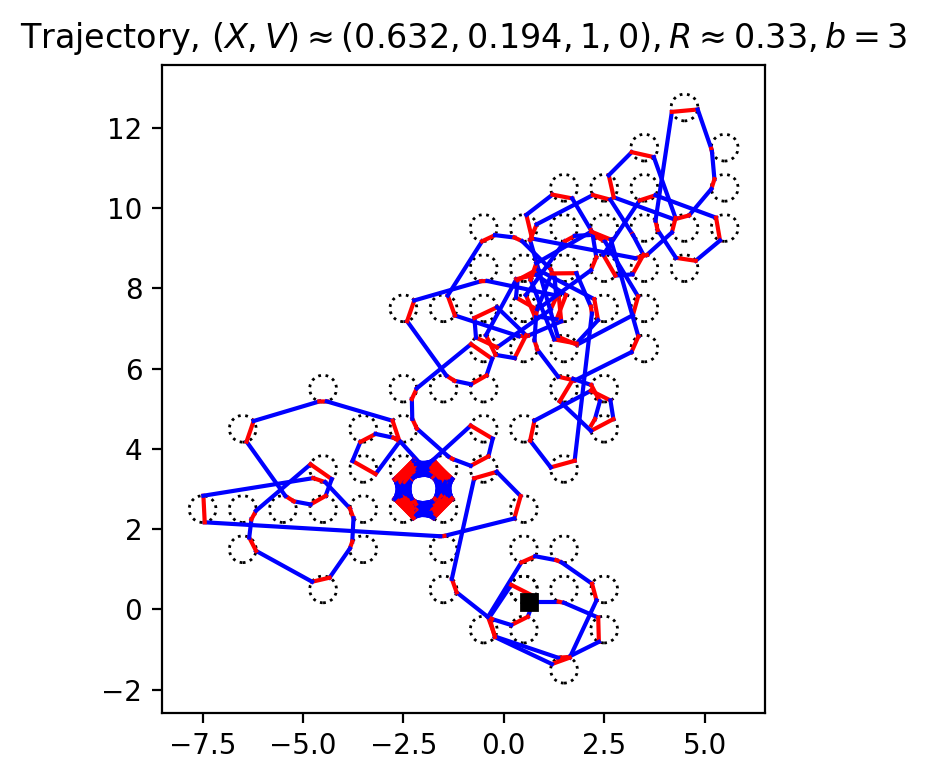

In [177]:
n = 256
R = 1/3
b = 3
Y = 0.19401740174017401740174017
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=1000)

fig, ax = plt.subplots(1, 1, dpi=200)

mag.plotCircles(ax, R, xydir)
mag.prettyPlotTrajectory(ax, XOut, XIn, xydir)

ax.set_aspect(1)

ax.set_title(f"Trajectory, $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f"{Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b={b}$")
fig.tight_layout()

plt.savefig("sensitive_trajectory.png")
plt.show()

[3.82517e-01 8.11944e-01 3.78308e-04 1.00000e+00]
1
1
1
1
1


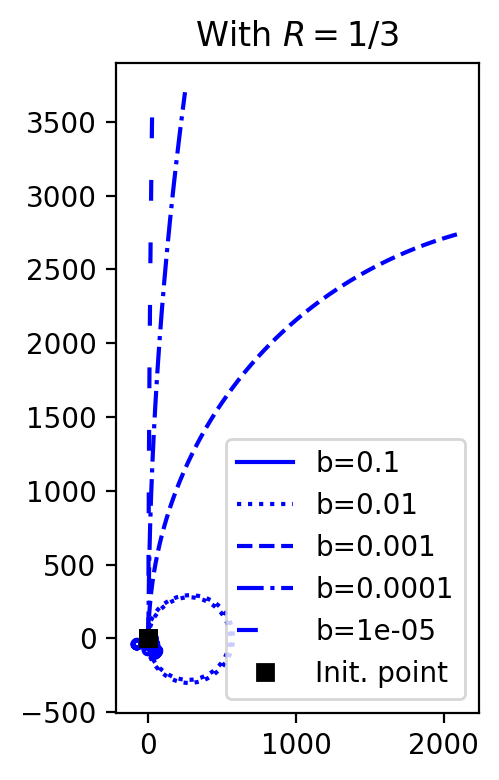

In [36]:
np.random.seed(1)
num = 5

R = 1/3
b = 10.0**np.arange(-1,-1-num,-1,dtype=int)
n = 2500*np.ones(num, dtype=int)
linestyles = ['solid','dotted','dashed','dashdot',(0, (5,10))]

X = np.random.random(2)-1/2
X = R*X/np.linalg.norm(X)
V = np.random.random(2)
V = V/np.linalg.norm(V)
V = V if np.dot(V,X) > 0 else -V
X = np.block([X+1/2,V])
print(X)



fig, ax = plt.subplots(1,1, dpi=200)


for idx, (i,j) in enumerate(zip(b, n)):
    XOut, XIn, xydir, entered = mag.orbit(X, R, i, int(j), maxIt=10000)
    print(entered)

    mag.plotTrajectory(ax, XOut, XIn, xydir, linestyle=linestyles[idx], label=f'b={i}')

ax.set_aspect(1)
ax.legend(loc="lower right")
ax.set_title("With $R=1/3$")
fig.tight_layout()

plt.savefig("weak_field_comparison_1.png")

plt.show()

[3.82517e-01 8.11944e-01 3.78308e-04 1.00000e+00]
1
1
1
1
1


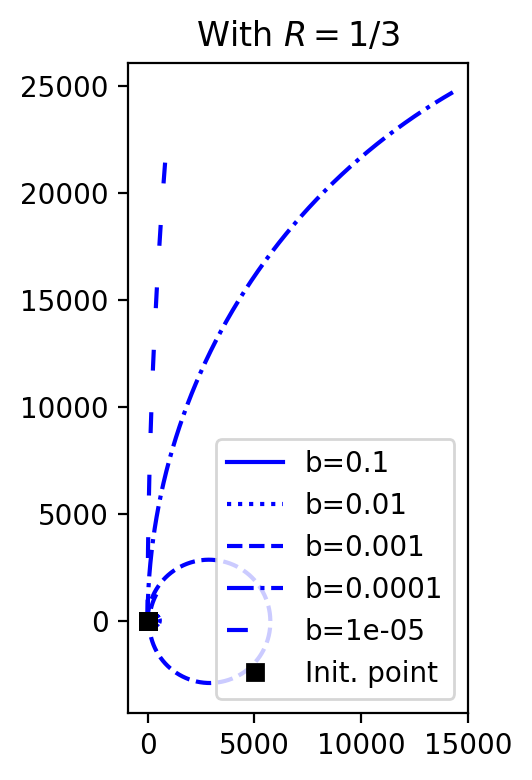

In [52]:
np.random.seed(1)

num = 5


R = 1/3
b = 10.0**np.arange(-1,-1-num,-1,dtype=int)
n = np.array([3000,3000,13000,20000,15000])
linestyles = ['solid','dotted','dashed','dashdot',(0, (5,10))]

X = np.random.random(2)-1/2
X = R*X/np.linalg.norm(X)
V = np.random.random(2)
V = V/np.linalg.norm(V)
V = V if np.dot(V,X) > 0 else -V
X = np.block([X+1/2,V])
print(X)



fig, ax = plt.subplots(1,1,dpi=200)


for idx, (i,j) in enumerate(zip(b, n)):
    XOut, XIn, xydir, entered = mag.orbit(X, R, i, int(j), maxIt=10000)
    print(entered)
    
    mag.plotTrajectory(ax, XOut, XIn, xydir, linestyle=linestyles[idx], label=f'b={i}')

    
ax.plot(XOut[0,0], XOut[0,1], "ks", label='Init. point')
ax.set_aspect(1)
ax.legend(loc="lower right")
ax.set_title("With $R=1/3$")
fig.tight_layout()

plt.savefig('weak_field_comparison_2.png')

plt.show()


[4.41258e-01 6.55972e-01 3.78308e-04 1.00000e+00]
1
1
1
1
1


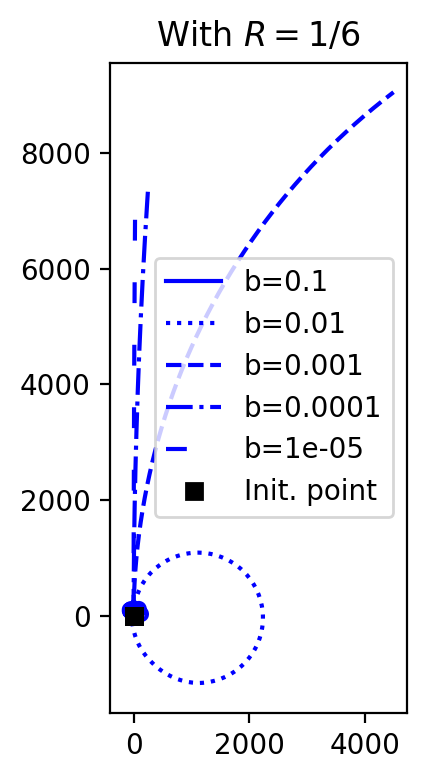

In [51]:
np.random.seed(1)

num = 5

R = 1/6
b = 10.0**np.arange(-1,-1-num,-1,dtype=int)
n = np.array([2500,2500,3500,2500,2500])
linestyles = ['solid','dotted','dashed','dashdot',(0, (5,10))]

X = np.random.random(2)-1/2
X = R*X/np.linalg.norm(X)
V = np.random.random(2)
V = V/np.linalg.norm(V)
V = V if np.dot(V,X) > 0 else -V
X = np.block([X+1/2,V])
print(X)


fig, ax = plt.subplots(1,1,dpi=200)


for idx, (i,j) in enumerate(zip(b, n)):
    XOut, XIn, xydir, entered = mag.orbit(X, R, i, int(j), maxIt=10000)
    print(entered)

    mag.plotTrajectory(ax, XOut, XIn, xydir, linestyle=linestyles[idx], label=f'b={i}')

    
ax.plot(XOut[0,0], XOut[0,1], "ks", label='Init. point')
ax.set_aspect(1)
ax.legend(loc=0)#"center right")
ax.set_title("With $R=1/6$")
fig.tight_layout()

plt.savefig("weak_field_comparison_3.png")

plt.show()

[ 0.5      0.16667  0.      -1.     ]


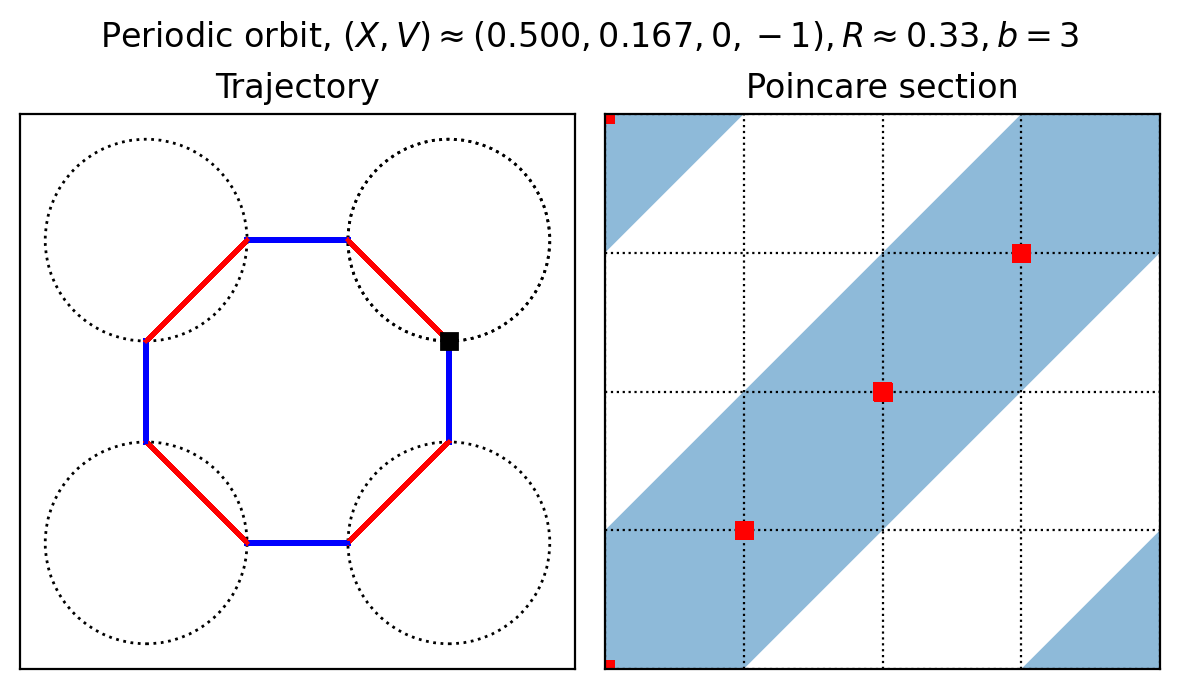

In [58]:
n = 2000
R = 1/3
b = 3
Y = -1/b + 1/2
X = 1/2 - np.sqrt(R**2-(Y-1/2)**2)
Xinit = np.array([ X  , Y, 0, -1])
print(Xinit)

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=1000)

fig, ax = plt.subplots(1, 2, dpi=200)


mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Periodic orbit, $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f"{Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b={b}$", y=0.925)
fig.tight_layout()

plt.savefig("stable_square_with_poincare.png")
plt.show()

[ 0.384   0.1875  0.     -1.    ]


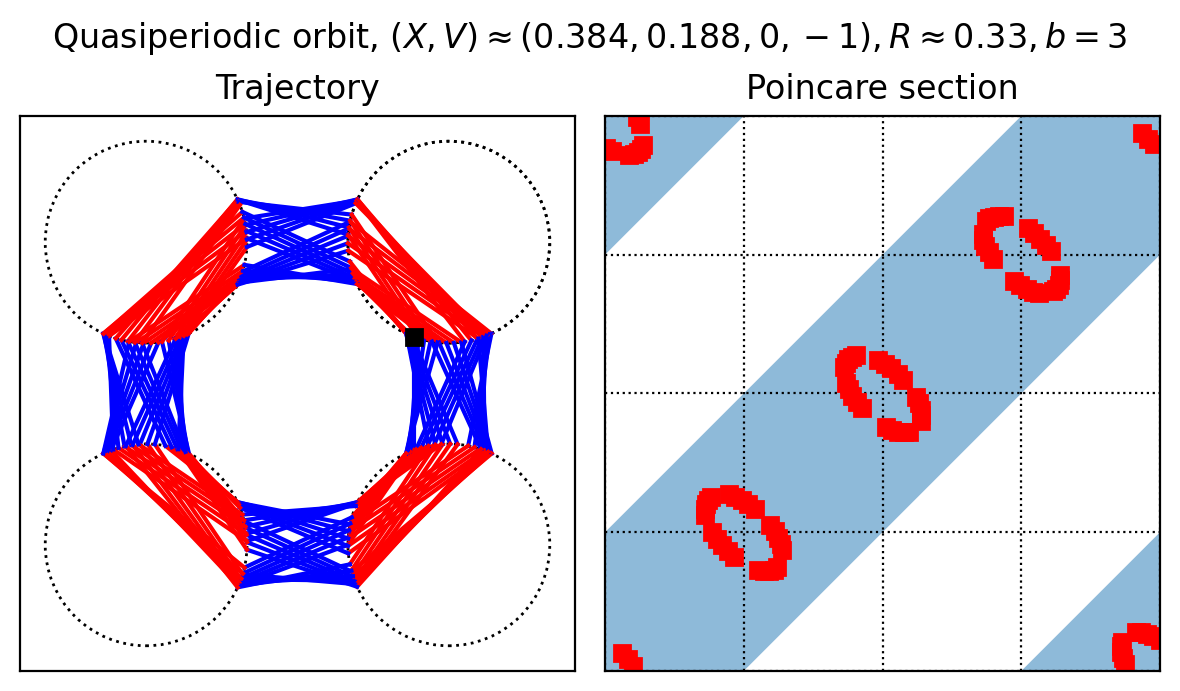

In [61]:
n = 100
R = 1/3
b = 3
Y = -1/3.2 + 1/2
X = 1/2 - np.sqrt(R**2-(Y-1/2)**2)
Xinit = np.array([ X  , Y, 0, -1])
print(Xinit)

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=1000)

fig, ax = plt.subplots(1, 2, dpi=200)


mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)


ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasiperiodic orbit, $(X,V)\\approx({Xinit[0]:.3f},{Xinit[1]:.3f},"
             f"{Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b={b}$", y=0.925)
fig.tight_layout()

plt.savefig("perturbed_stable_square_with_poincare.png")
plt.show()

[0.83333 0.5     1.      0.     ]


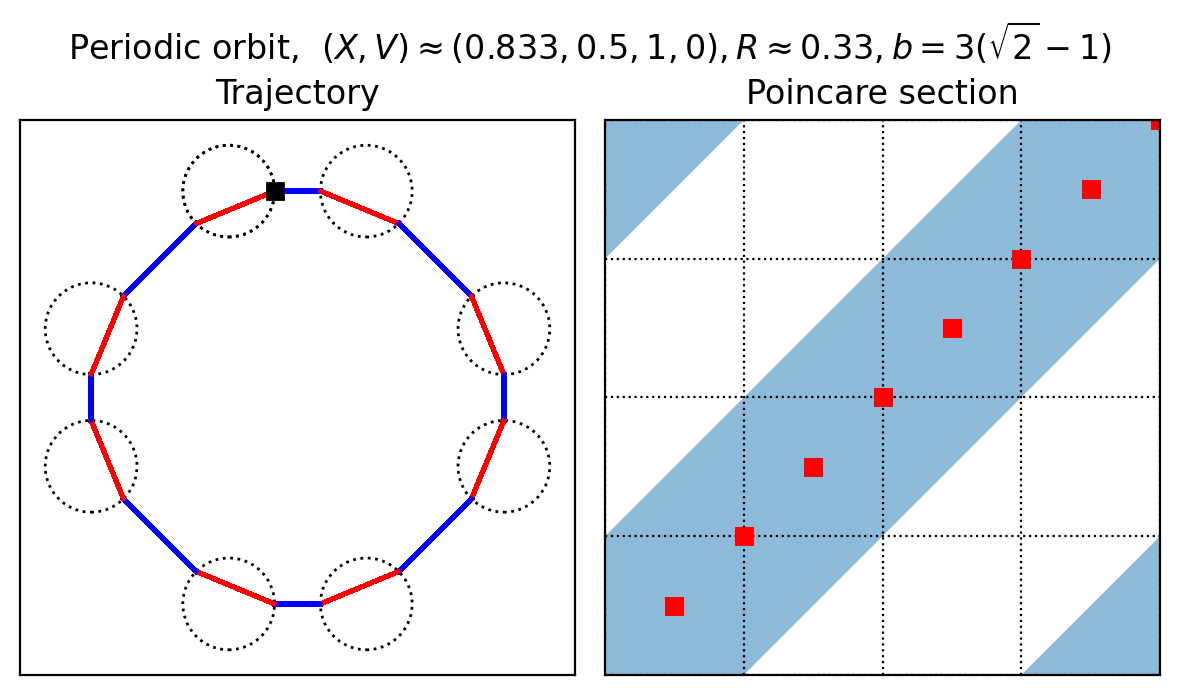

In [62]:
n = 2000
R = 1/3
b = 1/R*(np.sqrt(2)-1)
Y = 1/2
X = 5/6
Xinit = np.array([ X  , Y, 1, 0])
print(Xinit)

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=1000)

fig, ax = plt.subplots(1, 2, dpi=200)


mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.1f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f},"
             " b=3(\sqrt{2}-1)$", y=0.925)
fig.tight_layout()

plt.savefig("stable_octagon_with_poincare.png")
plt.show()

[0.82653 0.567   1.      0.     ]


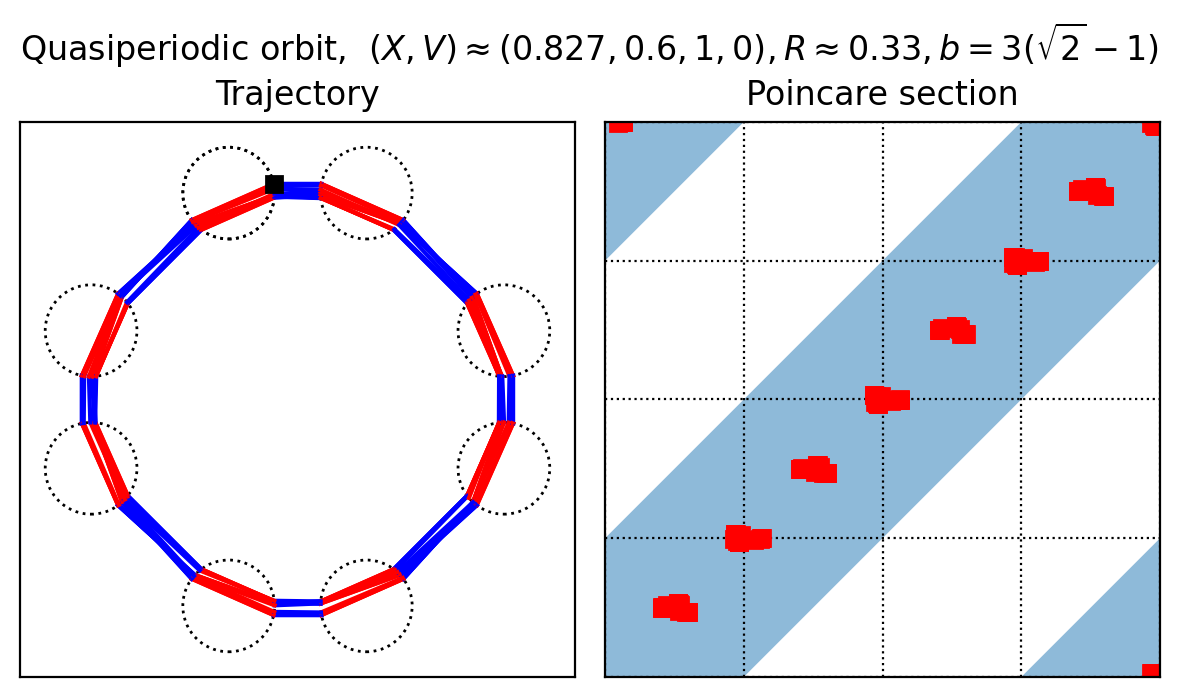

In [65]:
n = 100
R = 1/3
b = 1/R*(np.sqrt(2)-1)
Y = 1/2+0.067
X = 1/2 + np.sqrt(R**2 - (Y-1/2)**2)
Xinit = np.array([ X  , Y, 1, 0])
print(Xinit)

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=1000)

fig, ax = plt.subplots(1, 2, dpi=200)


mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasiperiodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.1f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f},"
             " b=3(\sqrt{2}-1)$",
        y=0.925)
fig.tight_layout()

plt.savefig("perturbed_stable_octagon_with_poincare.png")
plt.show()

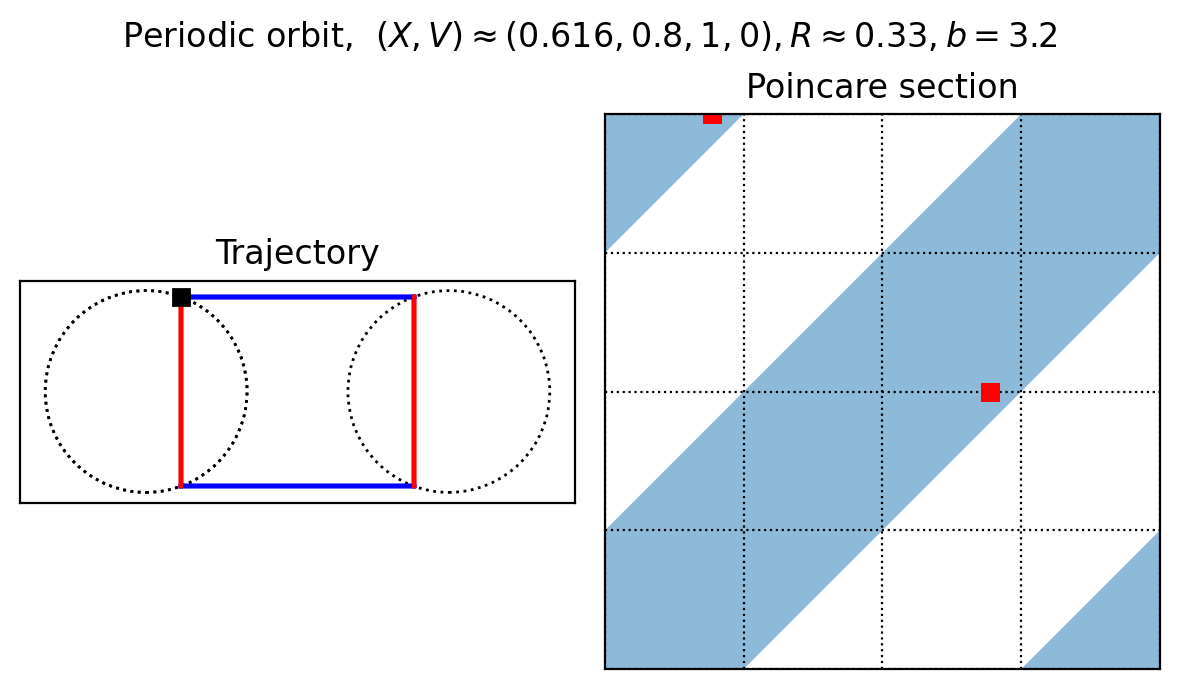

In [66]:
n = 20
R = 1/3
b = 3.2
Y = 1/b + 1/2
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)

Xinit = np.array([ X  , Y, 1, 0])
XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()


mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.1f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b={b:.1f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("unstable_square_with_poincare.png")
plt.show()

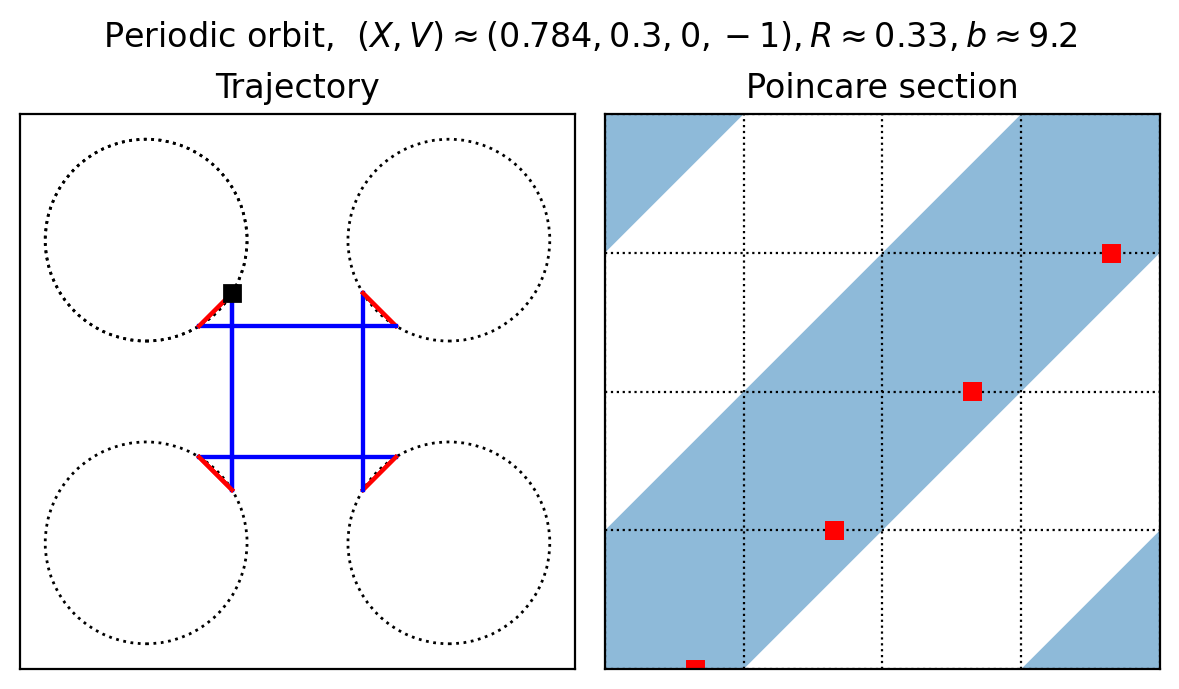

In [67]:
n = 10
R = 1/3
delta = 0.048
X = 1/2+1/np.sqrt(18)+delta
Y = 1/2 - np.sqrt(R**2-(X-1/2)**2)
b = 1/(X-1/2 - np.sqrt(R**2-(X-1/2)**2))
Xinit = np.array([ X  , Y, 0, -1])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.1f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.1f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("unstable_loopy_square_with_poincare.png")
plt.show()

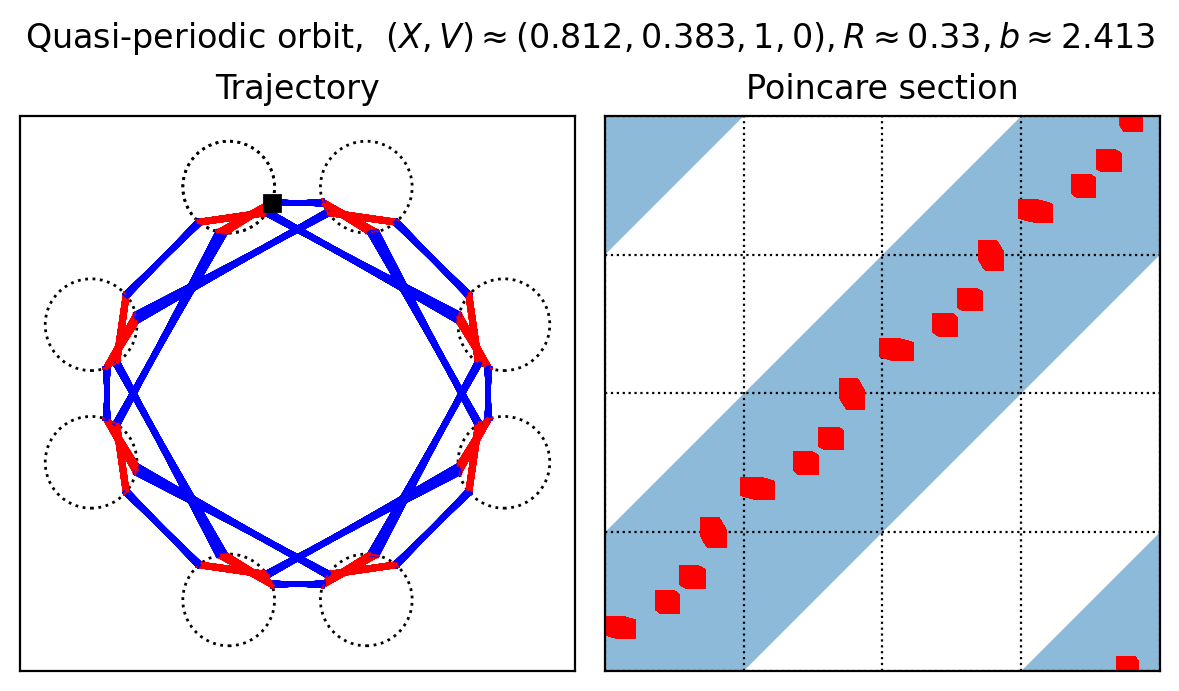

In [70]:
n = 2000
R = 1/3
Y = 0.383
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 2.413
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("star_with_poincare.png")
plt.show()

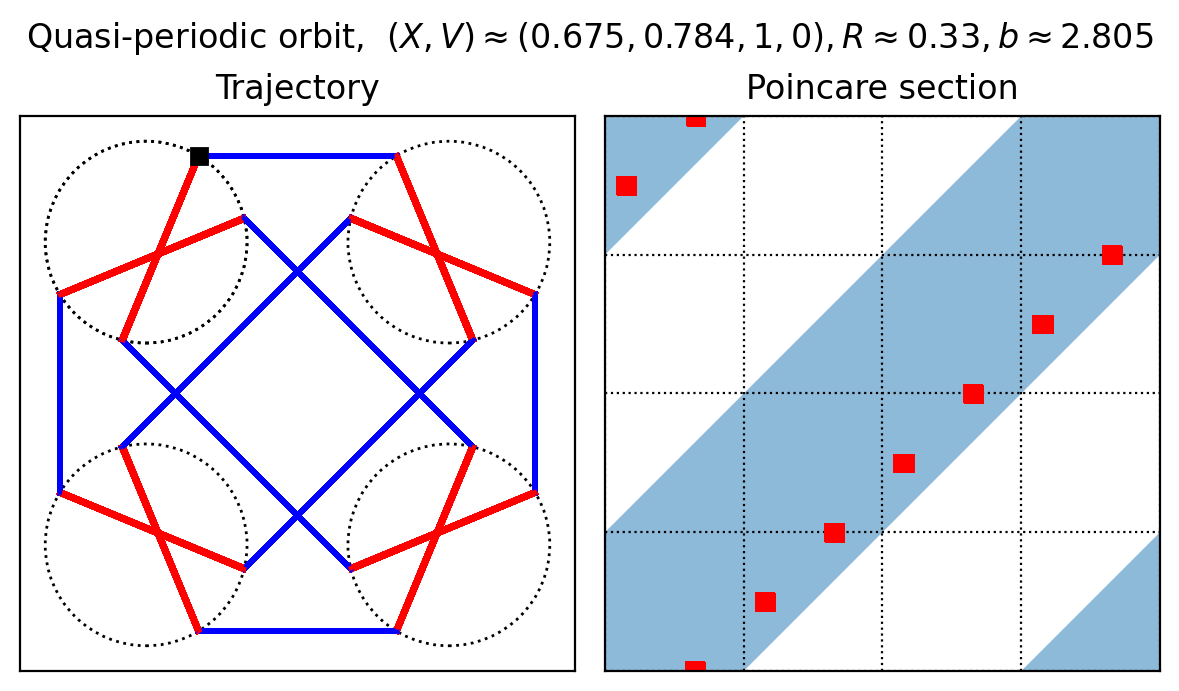

In [74]:
n = 2000
R = 1/3
Y = 0.784
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 2.805
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("strange_square_with_poincare.png")
plt.show()

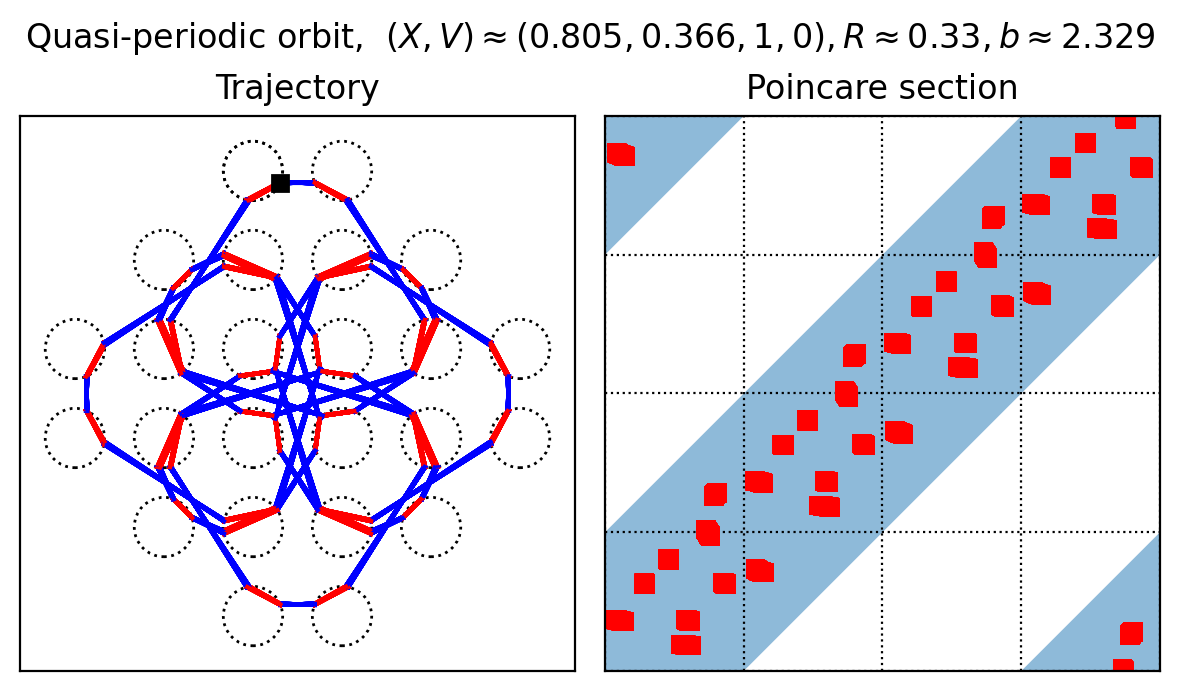

In [73]:
n = 2000
R = 1/3
Y = 0.366
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 2.329
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("sophisticated_with_poincare.png")
plt.show()

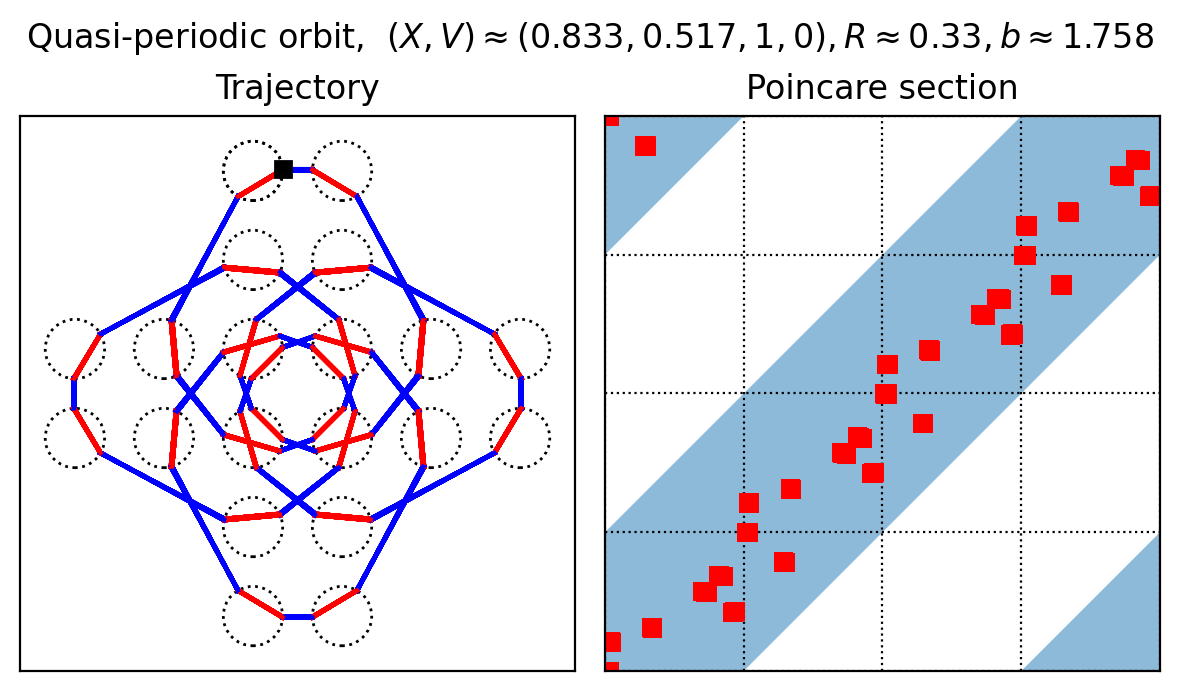

In [75]:
n = 2000
R = 1/3
Y = 0.517
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 1.758
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("distinguished_with_poincare.png")
plt.show()

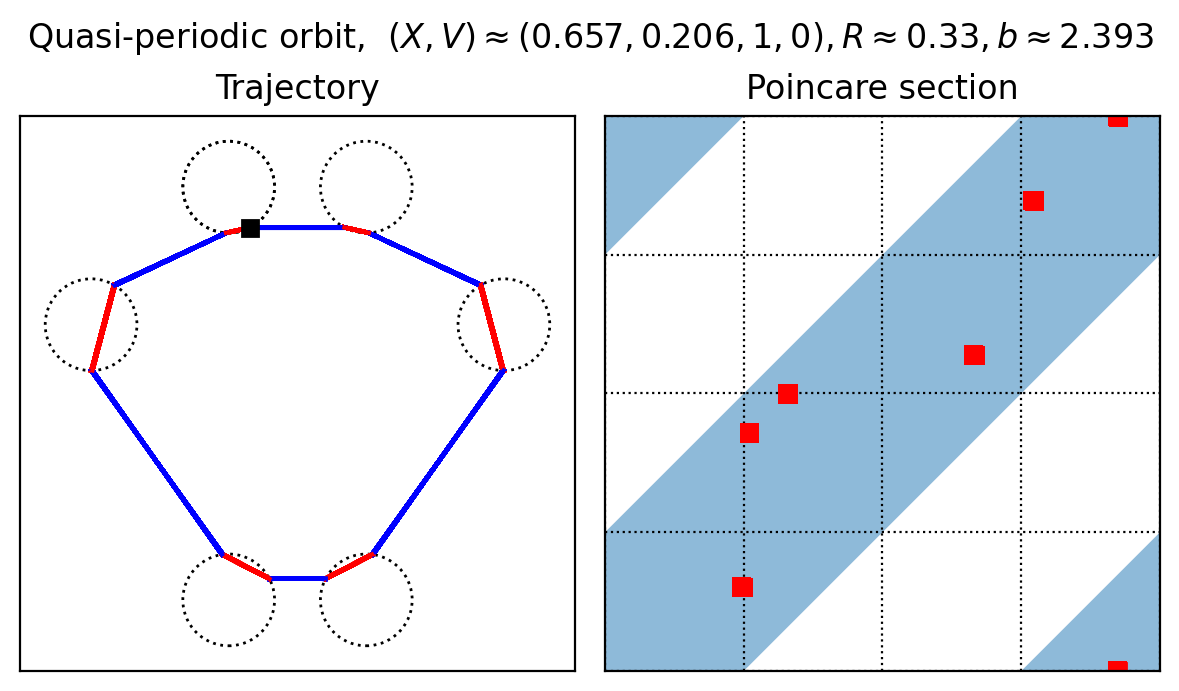

In [76]:
n = 2000
R = 1/3
Y = 0.206
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 2.393
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("lopsided_octagon_with_poincare.png")
plt.show()

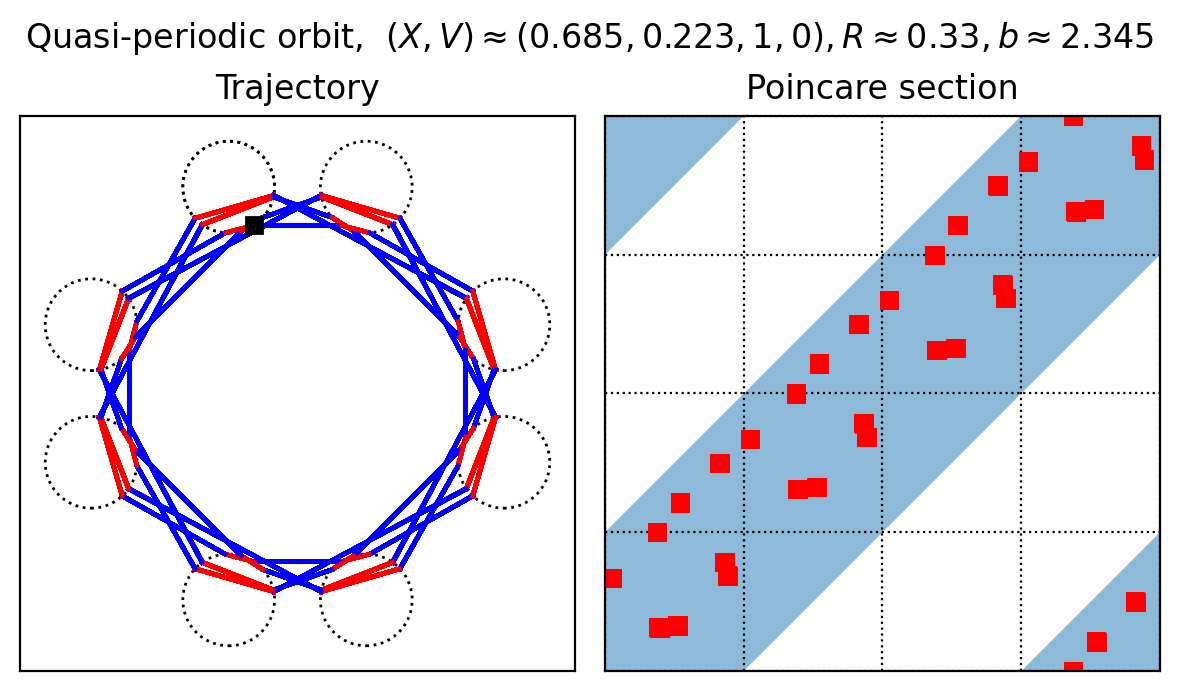

In [78]:
n = 2000
R = 1/3
Y = 0.223
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 2.345
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)


ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("doubled_star_with_poincare.png")
plt.show()

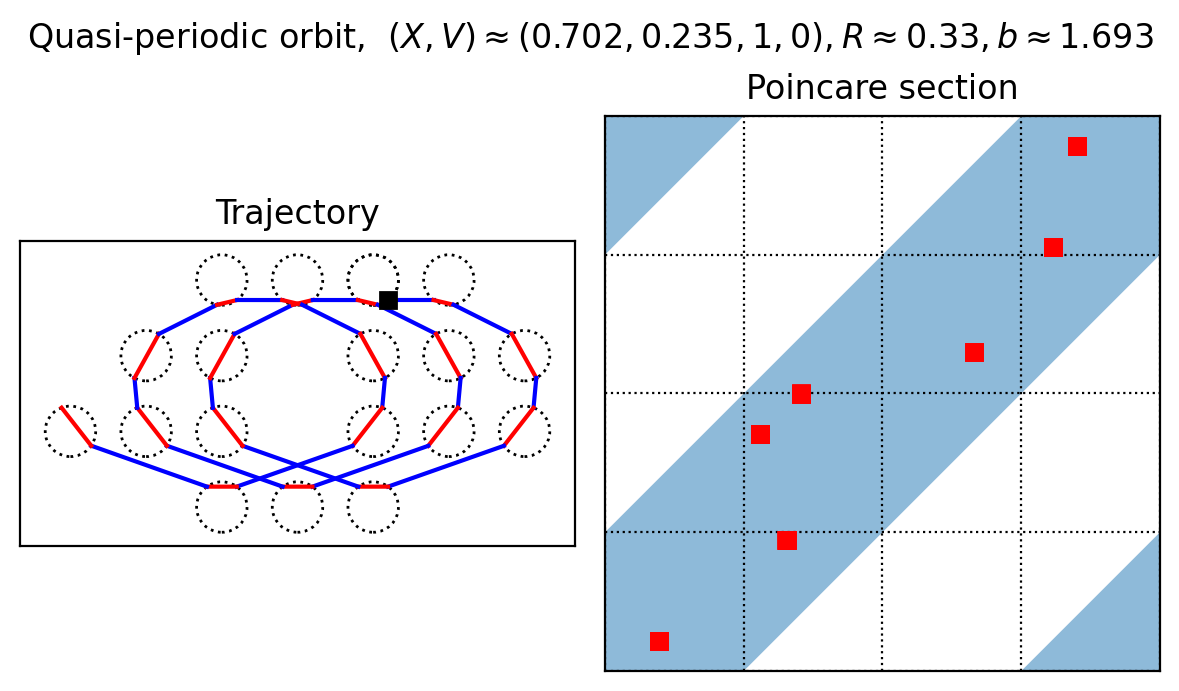

In [79]:
n = 20
R = 1/3
Y = 0.235
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 1.693
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)


ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("walker_with_poincare.png")
plt.show()

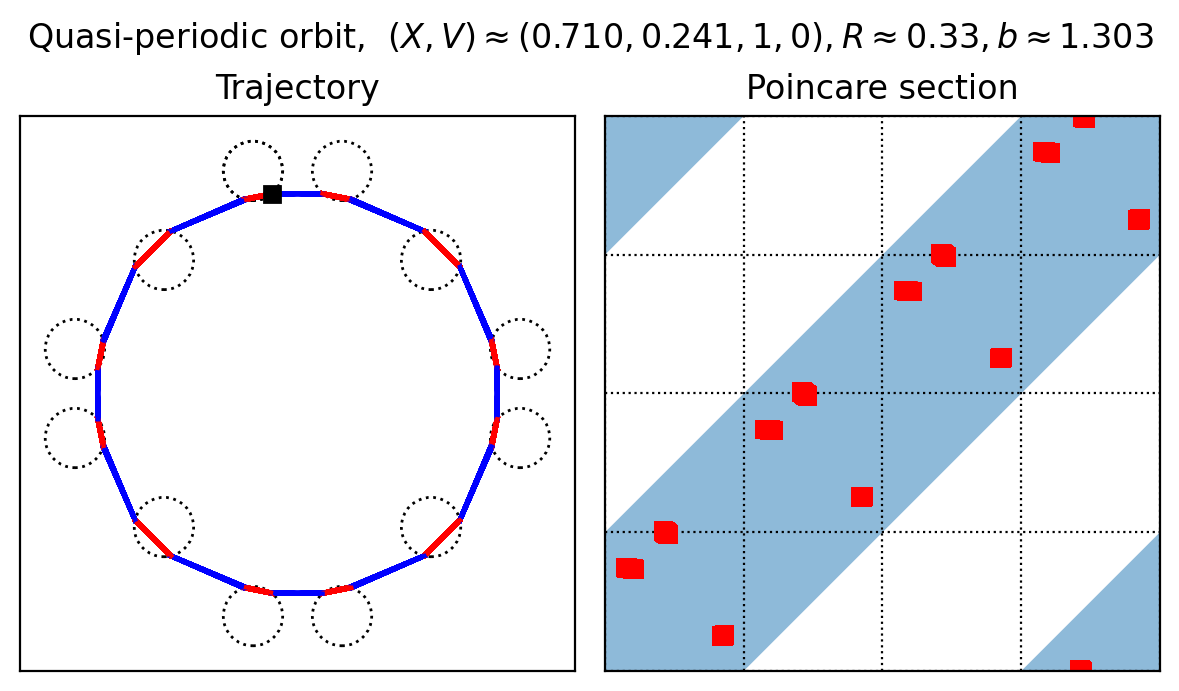

In [82]:
n = 2000
R = 1/3
Y = 0.241
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 1.303
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("12gon_with_poincare.png")
plt.show()

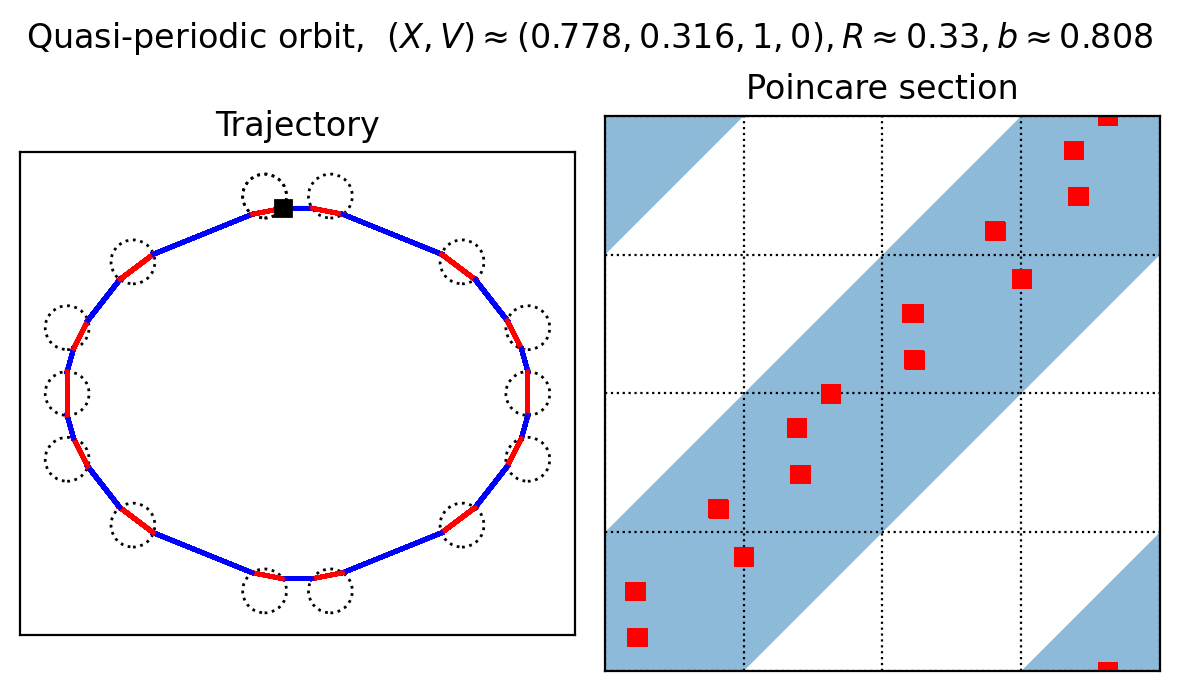

In [83]:
n = 2000
R = 1/3
Y = 0.316
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 0.808
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("egg_with_poincare.png")
plt.show()

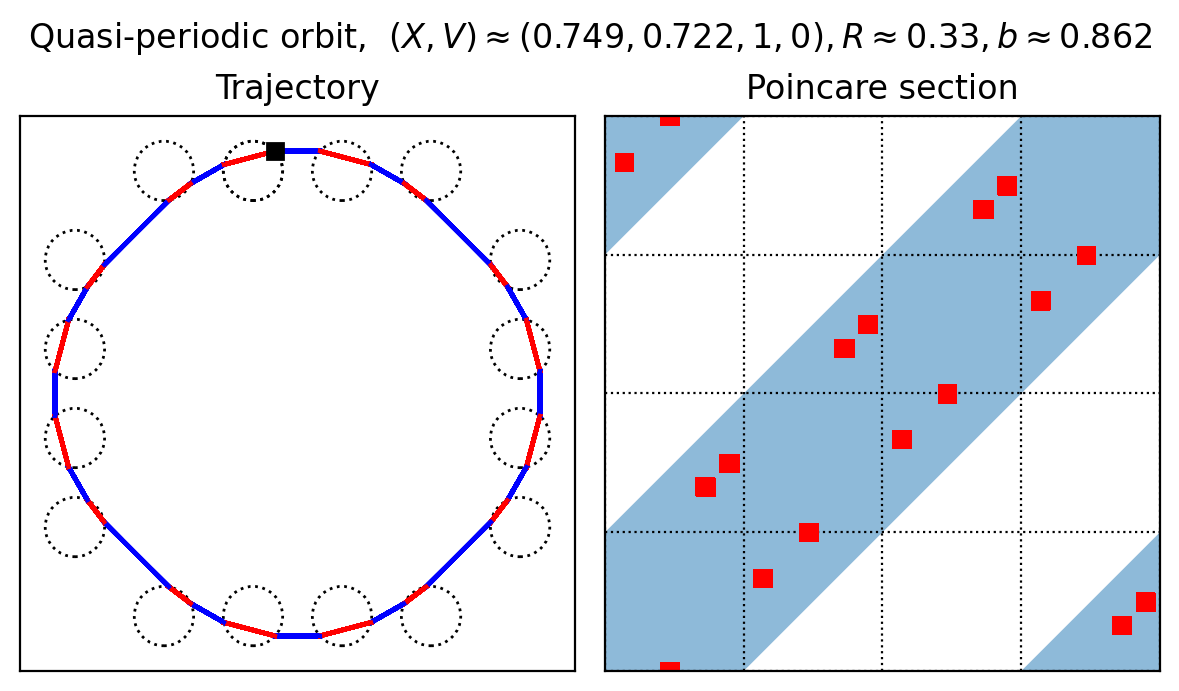

In [85]:
n = 2000
R = 1/3
Y = 0.722
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 0.862
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("big_square_with_poincare.png")
plt.show()

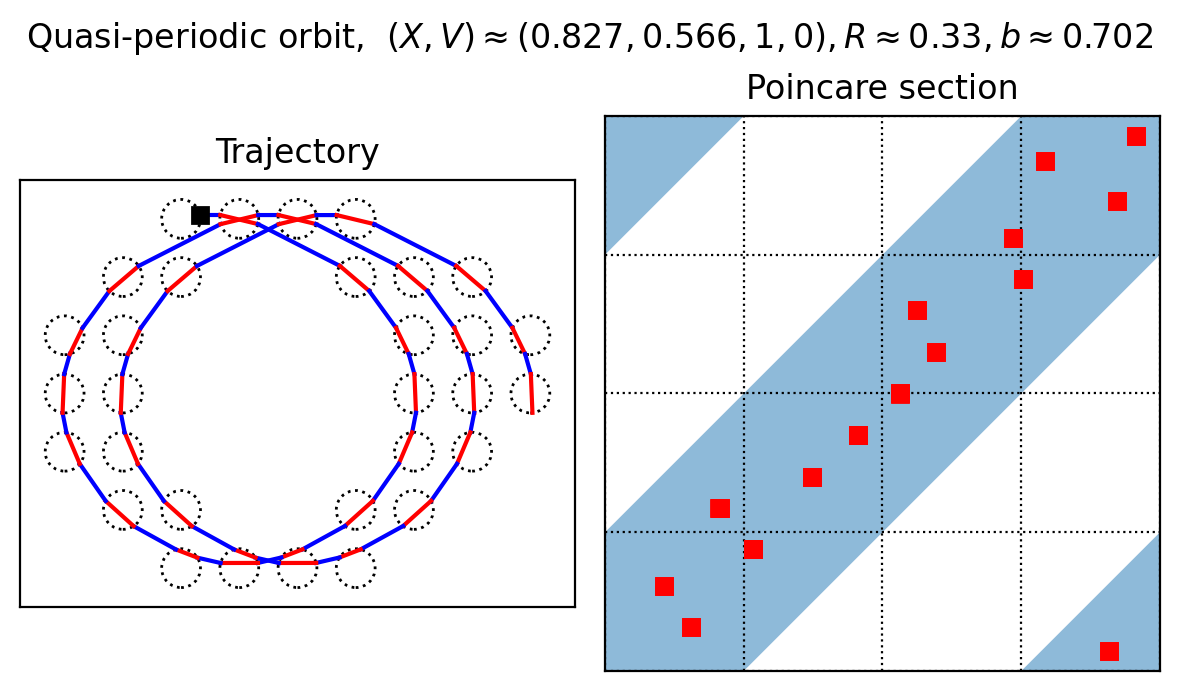

In [86]:
n = 35
R = 1/3
Y = 0.566
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 0.702
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("big_walker_with_poincare.png")
plt.show()

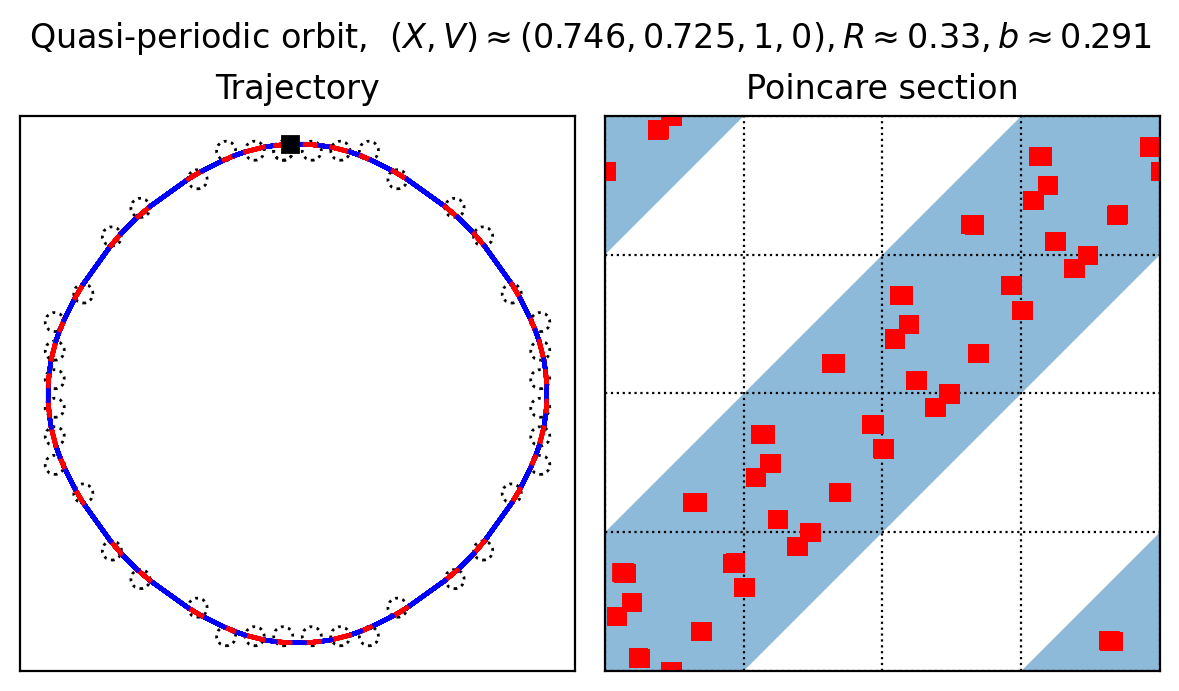

In [87]:
n = 2000
R = 1/3
Y = 0.725
X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
b = 0.291
Xinit = np.array([ X  , Y, 1, 0])

XOut, XIn, xydir, _ = mag.orbit(Xinit, R, b, n, maxIt=10000)


fig, ax = plt.subplots(1, 2, dpi=200)
fig.tight_layout()

mag.plotCircles(ax[0], R, xydir)
mag.prettyPlotTrajectory(ax[0], XOut, XIn, xydir)

mag.plotPoincareOut(ax[1], XOut)

ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, labelleft=False)

ax[0].set_title("Trajectory")
ax[1].set_title("Poincare section")

fig.suptitle(f"Quasi-periodic orbit,  $(X,V)\\approx({Xinit[0]:.3f}, {Xinit[1]:.3f},"
             f" {Xinit[2]:.0f}, {Xinit[3]:.0f}), R\\approx{R:.2f}, b\\approx{b:.3f}$",
        y=0.925)
fig.tight_layout()

plt.savefig("big_circle_with_poincare.png")
plt.show()

In [117]:
np.random.seed(1)

its = 500
num = 50
tries = 20

Rmin, Rmax = 0.25, 0.45
bmin, bmax = 1e-10, 1e-6
R = np.random.uniform(Rmin, Rmax, num)
b = np.random.uniform(bmin, bmax, num)

L = np.zeros(num)

for idx, (R1, b1) in tenumerate(list(zip(R,b))):
    
    cumul = np.zeros(tries)
    for i in range(tries):
        # generate random point on circle
        # and random velocity pointing outward
        th, ph = np.random.random(2)
        X = np.array([np.cos(th), np.sin(th)])
        V = np.array([np.cos(ph), np.sin(ph)])
        V = -V if np.dot(V, X) < 0 else V

        X = np.block([R1*X + 1/2,V])

        XOut, XIn, xydir, entered = mag.orbit(X, R1, b1, its, maxIt=10000)

        shifts = np.array([ np.sum(xy ,axis=0) for xy in xydir])
        shifts = np.add.accumulate(shifts,0)

        XIn[:,:2] += shifts
        XOut[:,:2] += np.vstack([np.zeros(2),shifts])
        Xs = np.zeros((2*its-1,4))
        Xs[::2] = XOut
        Xs[1::2] = XIn

        _, cumul[i] = mag.circleFit(Xs[:,:2].T)
    L[idx] = np.average(cumul)

print("done")

  0%|          | 0/50 [00:00<?, ?it/s]

done


[ 6.73830e-08 -6.25426e-07  6.75726e-03  1.90002e-06 -5.34975e-02
 -1.99847e+02 -1.87915e-06  3.22776e+00 -6.64707e+01 -3.01805e-04]
[]


/tmp/ipykernel_206396/3298934916.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), rotation = -50)
/tmp/ipykernel_206396/3298934916.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(ax.get_zticks(), rotation = -22)


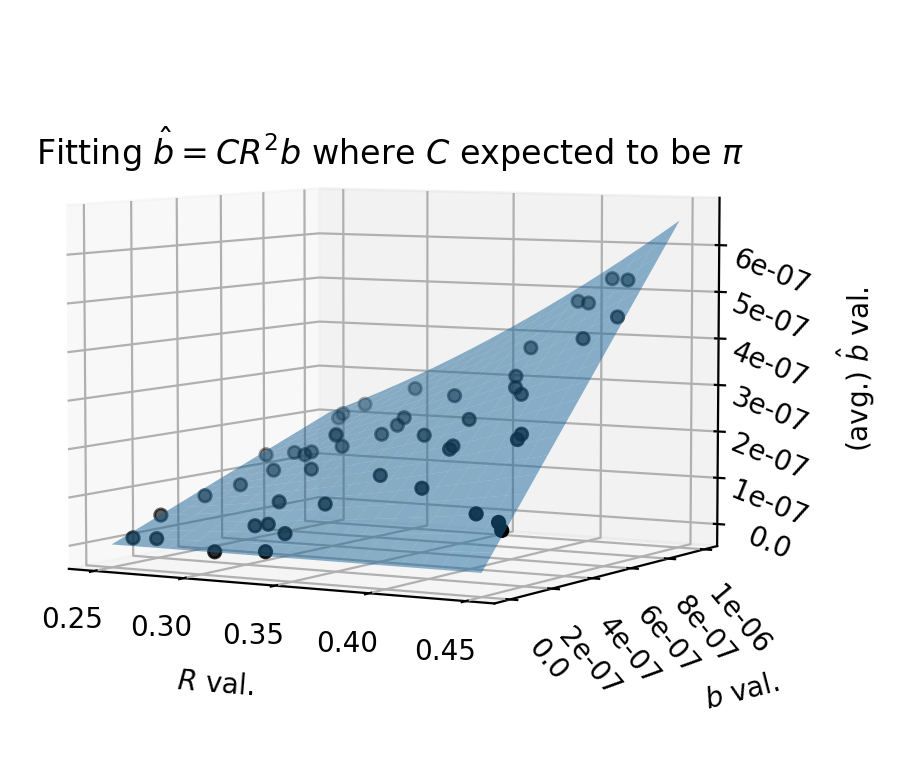

In [142]:
fig, ax = plt.subplots(1,1, dpi=200, subplot_kw=dict(projection="3d"), layout="tight")

A = np.array([R*0+1, R, b, R**2, R*b, b**2, R**3, R**2*b, R*b**2, b**3]).T
B = 1/L

coef, res, _, _ = np.linalg.lstsq(A, B, rcond=None)
print(coef)
print(res)
ax.scatter(R, b, 1/L, c="black")

x = np.linspace(Rmin, Rmax, 20) 
y = np.linspace(bmin, bmax,  20)
X, Y = np.meshgrid(x, y, copy=False)
Z = coef[7]*X**2*Y
ax.plot_surface(X, Y, Z, alpha = 0.5)

ax.set_yticklabels(ax.get_yticks(), rotation = -50)
ax.set_zticklabels(ax.get_zticks(), rotation = -22)

ax.set_title("Fitting $\hat b = CR^2b$ where $C$ expected to be $\pi$", y=0.85)
ax.set_xlabel("$R$ val.", labelpad=10)
ax.set_ylabel("$b$ val.", labelpad=20)
ax.set_zlabel("(avg.) $\hat b$ val.", labelpad=10)
ax.view_init(elev =5)

plt.savefig('kam_approx_surface.png')

plt.show()

In [119]:
np.random.seed(1)

its = 500
num = 50
tries = 20

R = 1/3
bmin, bmax = 1e-10, 1e-6
b = np.random.uniform(bmin, bmax, num)

L = np.zeros(num)

for idx, b1 in tenumerate(b):
    
    cumul = np.zeros(tries)
    for i in range(tries):
        # generate random point on circle
        # and random velocity pointing outward
        th, ph = np.random.random(2)
        X = np.array([np.cos(th), np.sin(th)])
        V = np.array([np.cos(ph), np.sin(ph)])
        V = -V if np.dot(V, X) < 0 else V

        X = np.block([R*X + 1/2,V])

        XOut, XIn, xydir, entered = mag.orbit(X, R, b1, its, maxIt=10000)

        shifts = np.array([ np.sum(xy ,axis=0) for xy in xydir])
        shifts = np.add.accumulate(shifts,0)

        XIn[:,:2] += shifts
        XOut[:,:2] += np.vstack([np.zeros(2),shifts])
        Xs = np.zeros((2*its-1,4))
        Xs[::2] = XOut
        Xs[1::2] = XIn

        _, cumul[i] = mag.circleFit(Xs[:,:2].T)
    L[idx] = np.average(cumul)
    

  0%|          | 0/50 [00:00<?, ?it/s]

[4.44406e-10 3.12621e+00]
[3.32945e-16]


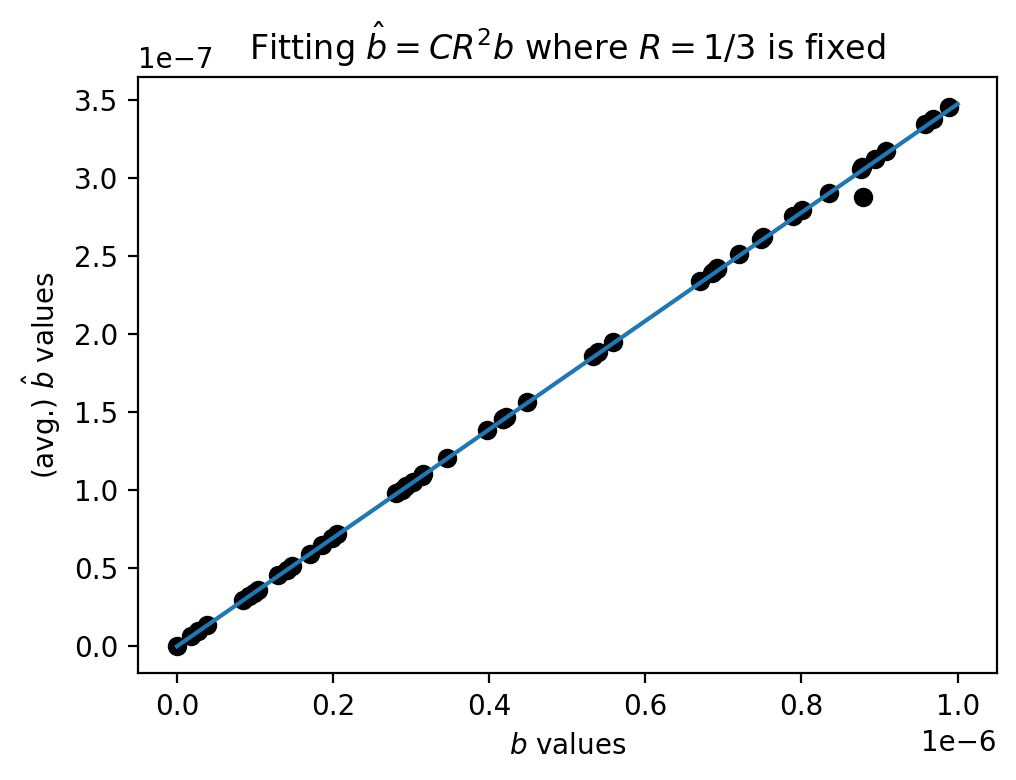

In [124]:
fig, ax = plt.subplots(1,1, dpi=200, layout="tight")

A = np.array([b*0+1, R**2*b]).T
B = 1/L

coef, res, _, _ = np.linalg.lstsq(A, B, rcond=None)
print(coef)
print(res)
ax.scatter(b, B, c="black")

x = np.linspace(bmin, bmax,  20)
y = coef[1]*R**2*x
ax.plot(x, y)

ax.set_aspect(2)
ax.set_title("Fitting $\hat b = CR^2b$ where $R=1/3$ is fixed")
ax.set_xlabel("$b$ values")
ax.set_ylabel("(avg.) $\hat b$ values")

plt.savefig('kam_approx_line.png')

plt.show()

In [219]:
n = 10000
dep = 128
b = 3
R = 1/3

Y =  np.linspace(-1, 1, n)*0.32+1/2

X = 1/2 + np.sqrt(R**2-(Y-1/2)**2)
Xinits = np.vstack([ X  , Y, np.ones(n), np.zeros(n)]).T
Xinits = [i for i in Xinits]

LZ = np.zeros(n)

for i, Xinit in tenumerate(Xinits):
    _, _, xydir, _ = mag.orbit(Xinit, R, b, dep, maxIt=10000)
    shifts = np.array([ np.sum(xy, axis=0) for xy in xydir])
    LZ[i] = mag.LZ76(list(zip(shifts[:,0],shifts[:,1])))

  0%|          | 0/10000 [00:00<?, ?it/s]

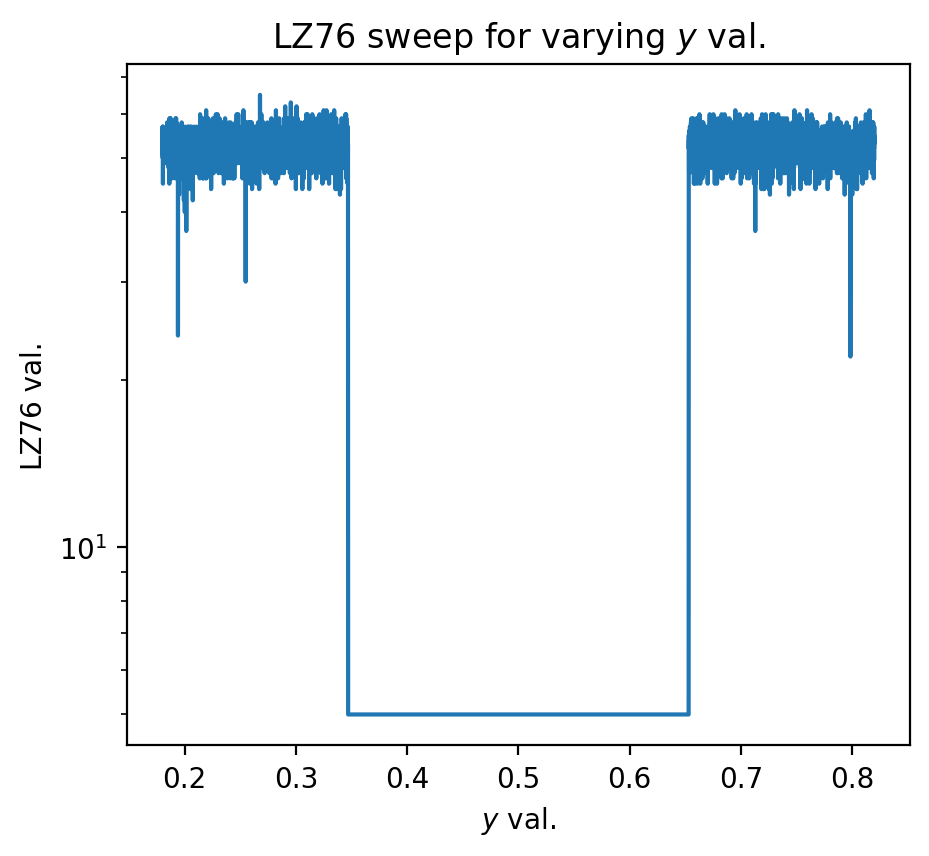

In [222]:
fig, ax = plt.subplots(1, 1, dpi=200)

fig.tight_layout()

ax.semilogy(Y, LZ)

ax.set_aspect(0.5)
ax.set_title("LZ76 sweep for varying $y$ val.")
ax.set_xlabel("$y$ val.")
ax.set_ylabel("LZ76 val.")

plt.savefig("LZ_y_sweep.png")

plt.show()

In [321]:
n = 1000
dep = 128
b = np.linspace(0.001, 5, n)
R = 1/3

Xinit = np.array([ 5/6, 1/2, 1, 0])

LZ = np.zeros(n)

for i, bs in tenumerate(b):
    _, _, xydir, _ = mag.orbit(Xinit, R, bs, dep, maxIt=10000)
    shifts = np.array([ np.sum(xy, axis=0) for xy in xydir])
    LZ[i] = mag.LZ76(list(zip(shifts[:,0],shifts[:,1])))

  0%|          | 0/1000 [00:00<?, ?it/s]

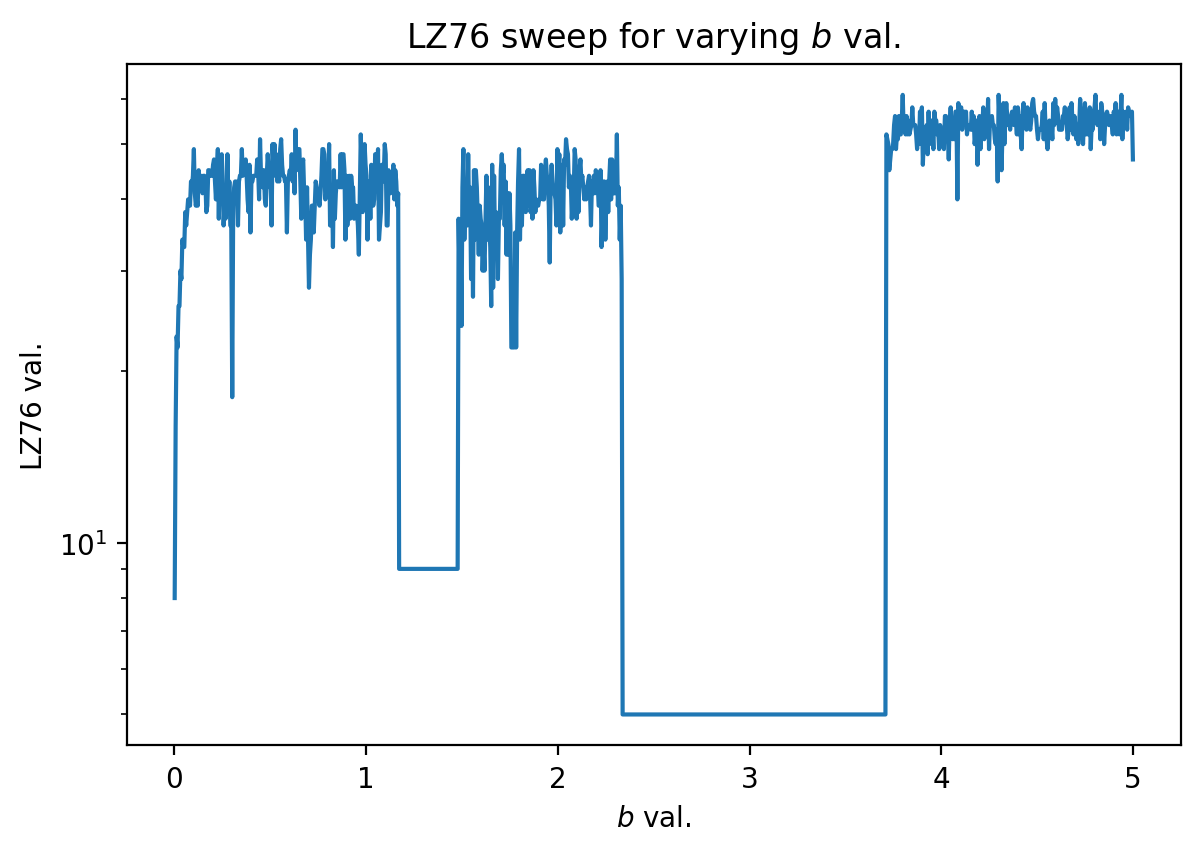

In [322]:
fig, ax = plt.subplots(1, 1, dpi=200)

fig.tight_layout()

ax.semilogy(b, LZ)

#ax.set_aspect(1)
ax.set_title("LZ76 sweep for varying $b$ val.")
ax.set_xlabel("$b$ val.")
ax.set_ylabel("LZ76 val.")

plt.savefig("LZ_b_sweep.png")

plt.show()

In [28]:
def LZ_sweep_Y_b(Y, b, its, R):
    
    LZs = np.zeros((Y.shape[0],b.shape[0]))
    V = np.array([1,0])
    
    for n, i in enumerate(b):
        for m, j in enumerate(Y):
            X = np.array([1/2 + np.sqrt(R**2-(j-1/2)**2), j])
            X = np.block([X,V])

            XOut, XIn, xydir, entered = mag.orbit(X, R, i, its, maxIt=10000)
            shifts = np.array([ np.sum(xy, axis=0) for xy in xydir])
            LZs[m,n] = mag.LZ76(list(zip(shifts[:,0],shifts[:,1])))
    return LZs


In [325]:
dim = 500
Y = np.linspace(-1, 1, dim)*0.32 + 0.5
Ydiff = Y[1]-Y[0]
b = np.linspace(0.001, 5, dim)
bdiff = b[1]-b[0]
its = 128 #128
R=1/3

cores = 8
proc_pool = Pool(cores)

inputs = [(Y[i*dim//cores:(i+1)*dim//cores], b, its, R) for i in range(cores)]
LZ2 = proc_pool.starmap(LZ_sweep_Y_b, inputs)

proc_pool.close()
proc_pool.join()

LZ2 = np.vstack(LZ2)

data = np.empty((3,dim, dim))

data[:2] = np.meshgrid(b, Y)
data[2] = LZ2

print(data)

with open('./depth=' + str(num) + ' R=033 n=1000 b=(0_001 5) Y=(0_5-0_32 0_5+0_32).npy', 'wb') as f:
    np.save(f, data)
f.close()

[[[1.00000e-03 1.10180e-02 2.10361e-02 ... 4.97996e+00 4.98998e+00
   5.00000e+00]
  [1.00000e-03 1.10180e-02 2.10361e-02 ... 4.97996e+00 4.98998e+00
   5.00000e+00]
  [1.00000e-03 1.10180e-02 2.10361e-02 ... 4.97996e+00 4.98998e+00
   5.00000e+00]
  ...
  [1.00000e-03 1.10180e-02 2.10361e-02 ... 4.97996e+00 4.98998e+00
   5.00000e+00]
  [1.00000e-03 1.10180e-02 2.10361e-02 ... 4.97996e+00 4.98998e+00
   5.00000e+00]
  [1.00000e-03 1.10180e-02 2.10361e-02 ... 4.97996e+00 4.98998e+00
   5.00000e+00]]

 [[1.80000e-01 1.80000e-01 1.80000e-01 ... 1.80000e-01 1.80000e-01
   1.80000e-01]
  [1.81283e-01 1.81283e-01 1.81283e-01 ... 1.81283e-01 1.81283e-01
   1.81283e-01]
  [1.82565e-01 1.82565e-01 1.82565e-01 ... 1.82565e-01 1.82565e-01
   1.82565e-01]
  ...
  [8.17435e-01 8.17435e-01 8.17435e-01 ... 8.17435e-01 8.17435e-01
   8.17435e-01]
  [8.18717e-01 8.18717e-01 8.18717e-01 ... 8.18717e-01 8.18717e-01
   8.18717e-01]
  [8.20000e-01 8.20000e-01 8.20000e-01 ... 8.20000e-01 8.20000e-01
   8.2

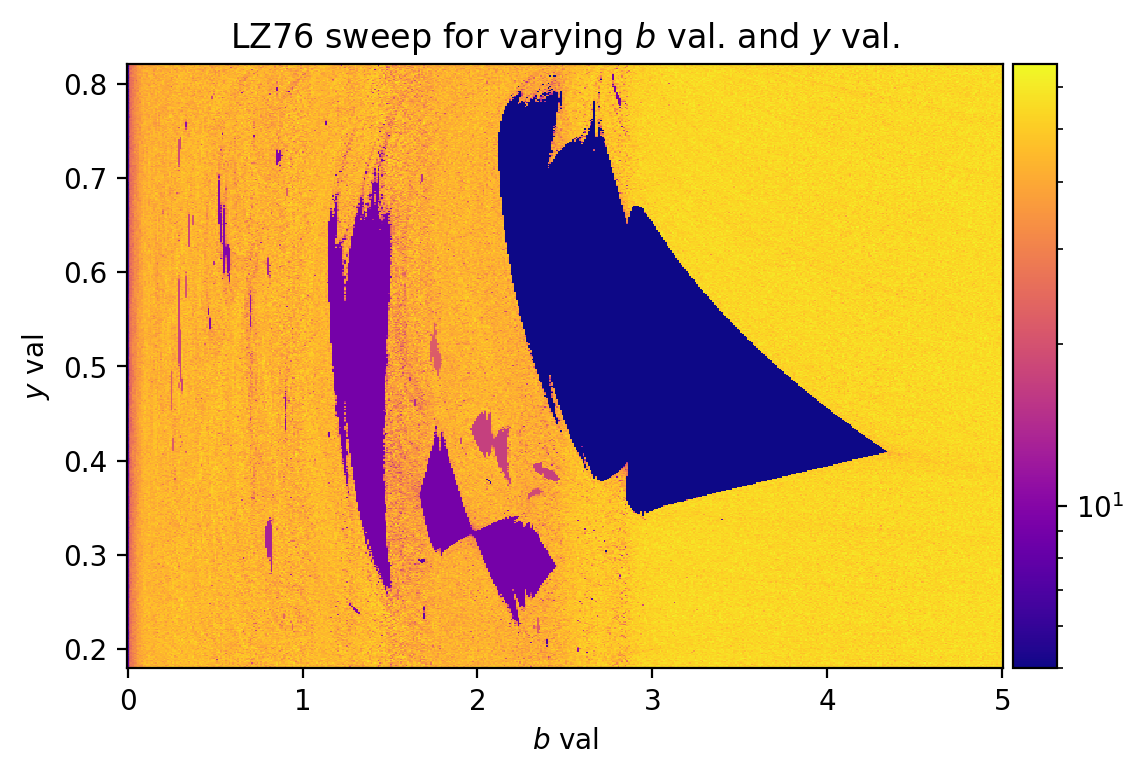

In [19]:
b, Y, LZ = np.load("depth=50 R=033 n=1000 b=(0_001 5) Y=(0_5-0_32 0_5+0_32).npy")

fig, ax = plt.subplots(1,1,dpi=200)

im = ax.pcolormesh(b, Y, LZ, norm=LogNorm(vmin=LZ.min(), vmax=LZ.max()), cmap="plasma")

ax.set_title("LZ76 sweep for varying $b$ val. and $y$ val.")
ax.set_xlabel("$b$ val")
ax.set_ylabel("$y$ val")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.savefig("LZ_b_Y_sweep.png")

plt.show()

In [89]:
dim = 500
Y = np.linspace(-1, 1, dim)*0.32 + 0.5
b = np.linspace(0.1, 1, dim)
its = 128
R=1/3

cores = 8
proc_pool = Pool(cores)

inputs = [(Y[i*dim//cores:(i+1)*dim//cores], b, its, R) for i in range(cores)]
LZ2 = proc_pool.starmap(LZ_sweep_Y_b, inputs)

proc_pool.close()
proc_pool.join()

LZ2 = np.vstack(LZ2)

data = np.empty((3,dim, dim))

data[:2] = np.meshgrid(b, Y)
data[2] = LZ2

print(data)

with open('./depth=' + str(its) + ' R=033 n=1000 b=(0_1 1) Y=(0_5-0_32 0_5+0_32).npy', 'wb') as f:
    np.save(f, data)
f.close()

[[[ 0.1      0.1018   0.10361 ...  0.99639  0.9982   1.     ]
  [ 0.1      0.1018   0.10361 ...  0.99639  0.9982   1.     ]
  [ 0.1      0.1018   0.10361 ...  0.99639  0.9982   1.     ]
  ...
  [ 0.1      0.1018   0.10361 ...  0.99639  0.9982   1.     ]
  [ 0.1      0.1018   0.10361 ...  0.99639  0.9982   1.     ]
  [ 0.1      0.1018   0.10361 ...  0.99639  0.9982   1.     ]]

 [[ 0.18     0.18     0.18    ...  0.18     0.18     0.18   ]
  [ 0.18128  0.18128  0.18128 ...  0.18128  0.18128  0.18128]
  [ 0.18257  0.18257  0.18257 ...  0.18257  0.18257  0.18257]
  ...
  [ 0.81743  0.81743  0.81743 ...  0.81743  0.81743  0.81743]
  [ 0.81872  0.81872  0.81872 ...  0.81872  0.81872  0.81872]
  [ 0.82     0.82     0.82    ...  0.82     0.82     0.82   ]]

 [[43.      43.      42.      ... 44.      43.      33.     ]
  [45.      40.      42.      ... 48.      46.      48.     ]
  [43.      44.      41.      ... 49.      47.      54.     ]
  ...
  [43.      41.      45.      ... 42.      33.  

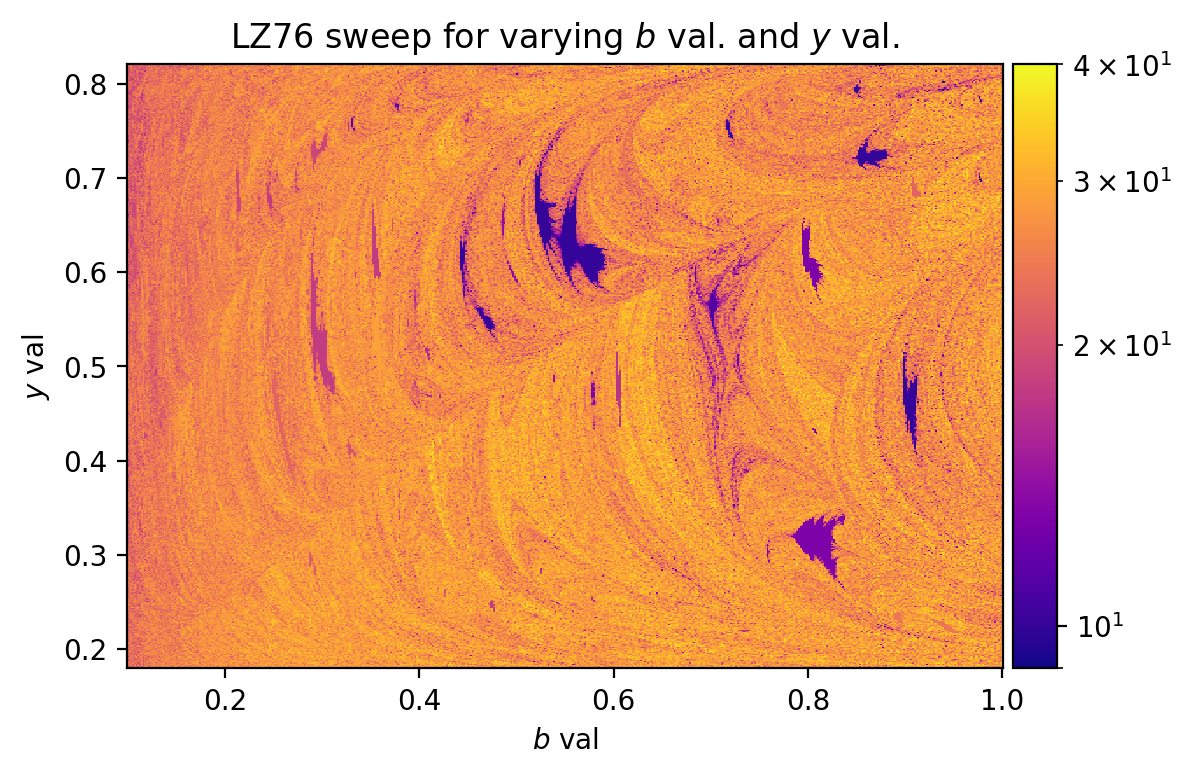

In [91]:
b, Y, LZ = np.load("depth=64 R=033 n=1000 b=(0_1 1) Y=(0_5-0_32 0_5+0_32).npy")

fig, ax = plt.subplots(1,1,dpi=200)

im = ax.pcolormesh(b, Y, LZ, norm=LogNorm(vmin=LZ.min(), vmax=LZ.max()), cmap="plasma")

ax.set_title("LZ76 sweep for varying $b$ val. and $y$ val.")
ax.set_xlabel("$b$ val")
ax.set_ylabel("$y$ val")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.savefig("LZ_b_(01_1)_Y_sweep.png")

plt.show()

In [43]:
dim = 500
Y = np.linspace(0.69, 0.82, dim)
b = np.linspace(2.08, 2.88, dim)
its = 64 #128
R=1/3

cores = 8
proc_pool = Pool(cores)

inputs = [(Y[i*dim//cores:(i+1)*dim//cores], b, its, R) for i in range(cores)]
LZ2 = proc_pool.starmap(LZ_sweep_Y_b, inputs)

proc_pool.close()
proc_pool.join()

LZ2 = np.vstack(LZ2)

data = np.empty((3,dim, dim))

data[:2] = np.meshgrid(b, Y)
data[2] = LZ2

print(data)

with open('./depth=' + str(its) + ' R=033 n=1000 b=(2_08 2_88) Y=(0_69 0_82).npy', 'wb') as f:
    np.save(f, data)
f.close()

[[[ 2.08     2.0816   2.08321 ...  2.87679  2.8784   2.88   ]
  [ 2.08     2.0816   2.08321 ...  2.87679  2.8784   2.88   ]
  [ 2.08     2.0816   2.08321 ...  2.87679  2.8784   2.88   ]
  ...
  [ 2.08     2.0816   2.08321 ...  2.87679  2.8784   2.88   ]
  [ 2.08     2.0816   2.08321 ...  2.87679  2.8784   2.88   ]
  [ 2.08     2.0816   2.08321 ...  2.87679  2.8784   2.88   ]]

 [[ 0.69     0.69     0.69    ...  0.69     0.69     0.69   ]
  [ 0.69026  0.69026  0.69026 ...  0.69026  0.69026  0.69026]
  [ 0.69052  0.69052  0.69052 ...  0.69052  0.69052  0.69052]
  ...
  [ 0.81948  0.81948  0.81948 ...  0.81948  0.81948  0.81948]
  [ 0.81974  0.81974  0.81974 ...  0.81974  0.81974  0.81974]
  [ 0.82     0.82     0.82    ...  0.82     0.82     0.82   ]]

 [[29.      22.      28.      ... 29.      32.      25.     ]
  [30.      23.      25.      ... 26.      31.      30.     ]
  [31.      26.      30.      ... 28.      25.      32.     ]
  ...
  [21.      26.      27.      ... 34.      17.  

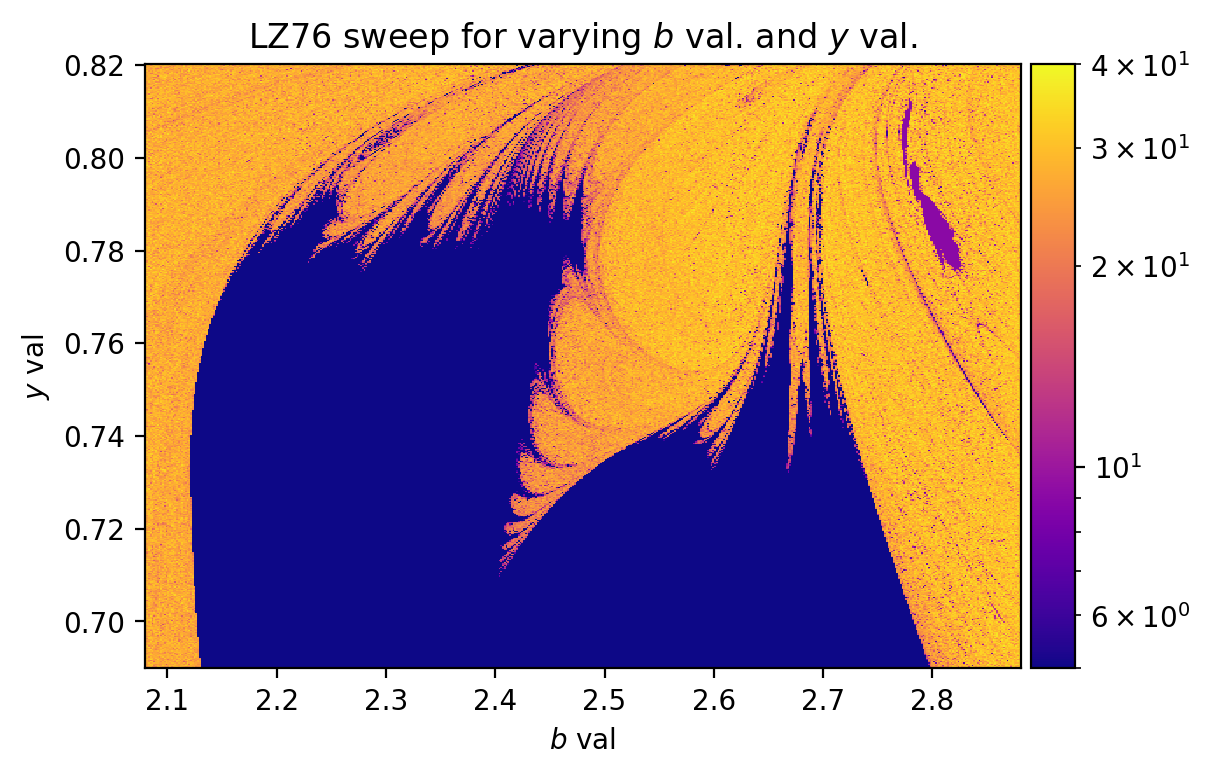

In [44]:
b, Y, LZ = np.load("depth=64 R=033 n=1000 b=(2_08 2_88) Y=(0_69 0_82).npy")

fig, ax = plt.subplots(1,1,dpi=200)

im = ax.pcolormesh(b, Y, LZ, norm=LogNorm(vmin=LZ.min(), vmax=LZ.max()), cmap="plasma")

ax.set_title("LZ76 sweep for varying $b$ val. and $y$ val.")
ax.set_xlabel("$b$ val")
ax.set_ylabel("$y$ val")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

#plt.savefig("LZ_b_(01_1)_Y_sweep.png")

plt.show()

In [51]:
def LZ_sweep_ph_th(ph, th, its, R, b):
    
    LZs = np.zeros((ph.shape[0],th.shape[0]))
    
    for n, i in enumerate(th):
        for m, j in enumerate(i+ph):
            X = np.array([np.cos(i), np.sin(i)])
            V = np.array([np.cos(j), np.sin(j)])
            X = np.block([R*X + 1/2,V])

            _, _, xydir, _ = mag.orbit(X, R, b, its, maxIt=10000)
            #print(XOut, XIn, xydir)
            shifts = np.array([ np.sum(xy, axis=0) for xy in xydir])
            LZs[m,n] = mag.LZ76(list(zip(shifts[:,0],shifts[:,1])))
    return LZs


dim = 500
th = np.linspace(-1, 1, dim)*np.pi/4
thdiff = th[1]-th[0]
ph = np.linspace(-0.99, 0.99, dim)*np.pi/2
phdiff = ph[1]-ph[0]
its = 16 #64
R=1/3
b=3

In [32]:
cores = 8
proc_pool = Pool(cores)

inputs = [(ph[i*dim//cores:(i+1)*dim//cores], th, its, R, b) for i in range(cores)]
LZ = proc_pool.starmap(LZ_sweep_ph_th, inputs)

proc_pool.close()
proc_pool.join()

LZ = np.vstack(LZ)

data = np.empty((3,dim, dim))
th, ph = np.meshgrid(th, ph)
data[0] = th
data[1] = ph+th
data[2] = LZ

print(data)

with open('./depth=' + str(its) + ' R=033 n=1000 th=(-pi_4 pi_4) ph=(-pi_2 pi_2).npy', 'wb') as f:
    np.save(f, data)
f.close()

[[[-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  ...
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]]

 [[-2.34049 -2.33734 -2.33419 ... -0.77599 -0.77284 -0.76969]
  [-2.33425 -2.33111 -2.32796 ... -0.76975 -0.76661 -0.76346]
  [-2.32802 -2.32487 -2.32173 ... -0.76352 -0.76037 -0.75722]
  ...
  [ 0.75722  0.76037  0.76352 ...  2.32173  2.32487  2.32802]
  [ 0.76346  0.76661  0.76975 ...  2.32796  2.33111  2.33425]
  [ 0.76969  0.77284  0.77599 ...  2.33419  2.33734  2.34049]]

 [[11.      14.      10.      ... 12.      11.      11.     ]
  [11.      12.      11.      ...  9.      12.      11.     ]
  [10.      11.      12.      ... 10.      13.      10.     ]
  ...
  [ 9.      13.      10.      ... 13.       9.  

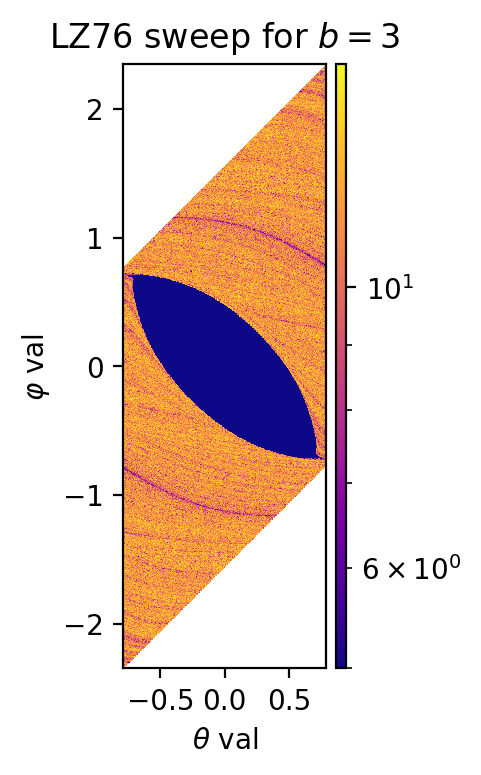

In [52]:
th, ph, LZ = np.load("depth=16 R=033 n=1000 th=(-pi_4 pi_4) ph=(-pi_2 pi_2).npy")

fig, ax = plt.subplots(1,1,dpi=200)

im = ax.pcolormesh(th, ph, LZ, norm=LogNorm(vmin=LZ.min(), vmax=LZ.max()), cmap="plasma")

ax.set_aspect(1)
ax.set_title(f"LZ76 sweep for $b={b}$")
ax.set_xlabel("$\\theta$ val")
ax.set_ylabel("$\\varphi$ val")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.savefig("LZ_th_ph_b_3_sweep.png")

plt.show()

In [41]:
dim = 500
th = np.linspace(-1, 1, dim)*np.pi/4
thdiff = th[1]-th[0]
ph = np.linspace(-0.99, 0.99, dim)*np.pi/2
phdiff = ph[1]-ph[0]
its = 64
R=1/3
b=2.32

cores = 8
proc_pool = Pool(cores)

inputs = [(ph[i*dim//cores:(i+1)*dim//cores], th, its, R, b) for i in range(cores)]
LZ = proc_pool.starmap(LZ_sweep_ph_th, inputs)

proc_pool.close()
proc_pool.join()

LZ = np.vstack(LZ)

data = np.empty((3,dim, dim))
th, ph = np.meshgrid(th, ph)
data[0] = th
data[1] = ph+th
data[2] = LZ

print(data)

with open('./depth=' + str(its) + ' b=2_32 R=033 n=1000 th=(-pi_4 pi_4) ph=(-pi_2 pi_2).npy', 'wb') as f:
    np.save(f, data)
f.close()

[[[-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  ...
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]]

 [[-2.34049 -2.33734 -2.33419 ... -0.77599 -0.77284 -0.76969]
  [-2.33425 -2.33111 -2.32796 ... -0.76975 -0.76661 -0.76346]
  [-2.32802 -2.32487 -2.32173 ... -0.76352 -0.76037 -0.75722]
  ...
  [ 0.75722  0.76037  0.76352 ...  2.32173  2.32487  2.32802]
  [ 0.76346  0.76661  0.76975 ...  2.32796  2.33111  2.33425]
  [ 0.76969  0.77284  0.77599 ...  2.33419  2.33734  2.34049]]

 [[19.      28.      26.      ... 28.      29.      19.     ]
  [28.      30.      25.      ... 29.      28.      28.     ]
  [32.      31.      27.      ... 26.      27.      32.     ]
  ...
  [25.      27.      22.      ... 24.      22.  

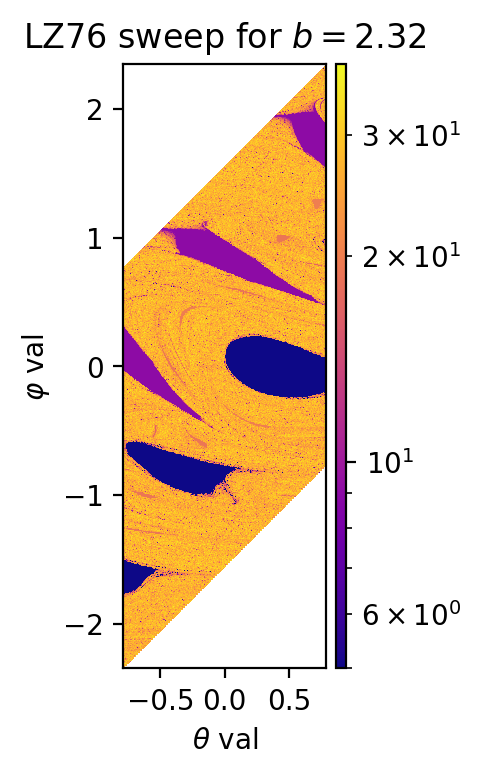

In [44]:
th, ph, LZ = np.load("depth=64 b=2_32 R=033 n=1000 th=(-pi_4 pi_4) ph=(-pi_2 pi_2).npy")

fig, ax = plt.subplots(1,1,dpi=200)

im = ax.pcolormesh(th, ph, LZ, norm=LogNorm(vmin=LZ.min(), vmax=LZ.max()), cmap="plasma")

ax.set_aspect(1)
ax.set_title(f"LZ76 sweep for $b={b}$")
ax.set_xlabel("$\\theta$ val")
ax.set_ylabel("$\\varphi$ val")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.savefig("LZ_th_ph_b_2_32_sweep.png")

plt.show()

In [47]:
dim = 500
th = np.linspace(-1, 1, dim)*np.pi/4
thdiff = th[1]-th[0]
ph = np.linspace(-0.99, 0.99, dim)*np.pi/2
phdiff = ph[1]-ph[0]
its = 64
R=1/3
b=3*(np.sqrt(2)-1)

cores = 8
proc_pool = Pool(cores)

inputs = [(ph[i*dim//cores:(i+1)*dim//cores], th, its, R, b) for i in range(cores)]
LZ = proc_pool.starmap(LZ_sweep_ph_th, inputs)

proc_pool.close()
proc_pool.join()

LZ = np.vstack(LZ)

data = np.empty((3,dim, dim))
th, ph = np.meshgrid(th, ph)
data[0] = th
data[1] = ph+th
data[2] = LZ

print(data)

with open('./depth=' + str(its) + ' b=3sqrt2-3 R=033 n=1000 th=(-pi_4 pi_4) ph=(-pi_2 pi_2).npy', 'wb') as f:
    np.save(f, data)
f.close()

[[[-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  ...
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]
  [-0.7854  -0.78225 -0.7791  ...  0.7791   0.78225  0.7854 ]]

 [[-2.34049 -2.33734 -2.33419 ... -0.77599 -0.77284 -0.76969]
  [-2.33425 -2.33111 -2.32796 ... -0.76975 -0.76661 -0.76346]
  [-2.32802 -2.32487 -2.32173 ... -0.76352 -0.76037 -0.75722]
  ...
  [ 0.75722  0.76037  0.76352 ...  2.32173  2.32487  2.32802]
  [ 0.76346  0.76661  0.76975 ...  2.32796  2.33111  2.33425]
  [ 0.76969  0.77284  0.77599 ...  2.33419  2.33734  2.34049]]

 [[16.      27.      30.      ... 34.      29.      16.     ]
  [20.      23.      29.      ... 29.      25.      20.     ]
  [23.      31.      25.      ... 31.      28.      23.     ]
  ...
  [25.      20.      28.      ... 24.      30.  

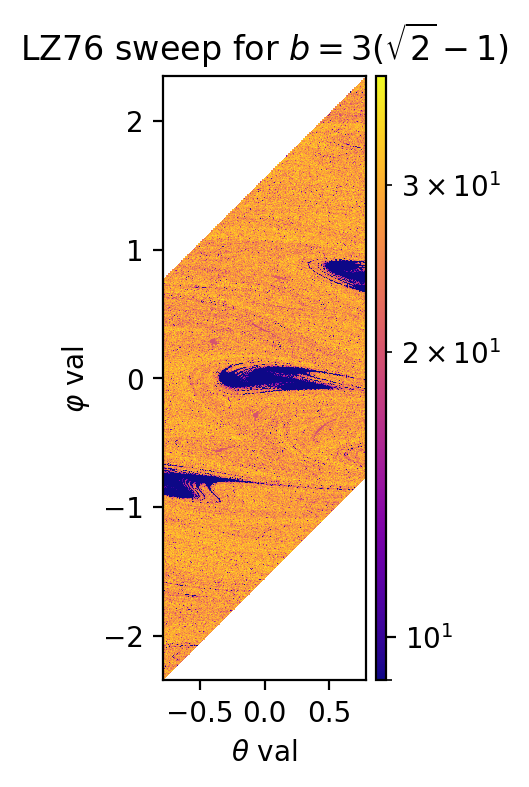

In [50]:
th, ph, LZ = np.load("depth=64 b=3sqrt2-3 R=033 n=1000 th=(-pi_4 pi_4) ph=(-pi_2 pi_2).npy")

fig, ax = plt.subplots(1,1,dpi=200)

im = ax.pcolormesh(th, ph, LZ, norm=LogNorm(vmin=LZ.min(), vmax=LZ.max()), cmap="plasma")

ax.set_aspect(1)
ax.set_title("LZ76 sweep for $b=3(\\sqrt{2}-1)$")
ax.set_xlabel("$\\theta$ val")
ax.set_ylabel("$\\varphi$ val")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.savefig("LZ_th_ph_b_3sqrt2-1_sweep.png")

plt.show()

In [49]:
3*(np.sqrt(2)-1)

1.2426406871192854